In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import numpy as np
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

import os
os.environ["PROJ_LIB"]='C:/Users/Chavez/AppData/Local/Programs/Python/Python38-32/lib/site-packages/pyproj/proj_dir/share/proj'
#os.environ["PROJ_LIB"]='C:/Users/Chavez/anaconda3/pkgs/basemap-1.2.1-py38h79c95a4_1/Library/share/basemap'
#os.environ['PROJ_LIB']='C:/Users/Chavez/anaconda3/Lib/site-packages/mpl_toolkits/basemap'
#os.environ['PROJ_LIB']='C:/Users/Chavez/anaconda3/pkgs/proj4-5.2.0-h6538335_1006/Library/share'

from mpl_toolkits.basemap import Basemap
from wrf import to_np, getvar, smooth2d, get_basemap, latlon_coords, interplevel, get_cartopy, cartopy_xlim, cartopy_ylim


Bad key "text.kerning_factor" on line 4 in
C:\Users\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
%matplotlib inline
from math import*
from scipy import stats
import matplotlib.pyplot as plt
from pylab import*
from scipy.stats import norm
import pandas as pd
from numpy import*

In [3]:
# Open D02
file1 = Dataset("wrfout_d02_1")
file2 = Dataset("wrfout_d02_2")
file3 = Dataset("wrfout_d02_3")
file4 = Dataset("wrfout_d02_4")
file5 = Dataset("wrfout_d02_5")
file6 = Dataset("wrfout_d02_6")
file7 = Dataset("wrfout_d02_7")
file8 = Dataset("wrfout_d02_8")
file9 = Dataset("wrfout_d02_9")

In [4]:
print(list(file1.variables))

['Times', 'XLAT', 'XLONG', 'LU_INDEX', 'ZNU', 'ZNW', 'ZS', 'DZS', 'VAR_SSO', 'U', 'V', 'W', 'PH', 'PHB', 'T', 'THM', 'HFX_FORCE', 'LH_FORCE', 'TSK_FORCE', 'HFX_FORCE_TEND', 'LH_FORCE_TEND', 'TSK_FORCE_TEND', 'MU', 'MUB', 'NEST_POS', 'P', 'PB', 'FNM', 'FNP', 'RDNW', 'RDN', 'DNW', 'DN', 'CFN', 'CFN1', 'THIS_IS_AN_IDEAL_RUN', 'P_HYD', 'Q2', 'T2', 'TH2', 'PSFC', 'U10', 'V10', 'RDX', 'RDY', 'RESM', 'ZETATOP', 'CF1', 'CF2', 'CF3', 'ITIMESTEP', 'XTIME', 'QVAPOR', 'QCLOUD', 'QRAIN', 'SHDMAX', 'SHDMIN', 'SNOALB', 'TSLB', 'SMOIS', 'SH2O', 'SMCREL', 'SEAICE', 'XICEM', 'SFROFF', 'UDROFF', 'IVGTYP', 'ISLTYP', 'VEGFRA', 'GRDFLX', 'ACGRDFLX', 'ACSNOM', 'SNOW', 'SNOWH', 'CANWAT', 'SSTSK', 'COSZEN', 'LAI', 'DTAUX3D', 'DTAUY3D', 'DUSFCG', 'DVSFCG', 'VAR', 'CON', 'OA1', 'OA2', 'OA3', 'OA4', 'OL1', 'OL2', 'OL3', 'OL4', 'MAPFAC_M', 'MAPFAC_U', 'MAPFAC_V', 'MAPFAC_MX', 'MAPFAC_MY', 'MAPFAC_UX', 'MAPFAC_UY', 'MAPFAC_VX', 'MF_VX_INV', 'MAPFAC_VY', 'F', 'E', 'SINALPHA', 'COSALPHA', 'HGT', 'TSK', 'P_TOP', 'T00'

In [6]:
lat = getvar(file1,'XLAT')
lon = getvar(file1,'XLONG')
lat, lon

(<xarray.DataArray 'XLAT' (south_north: 54, west_east: 60)>
 array([[0.10359192, 0.10359192, 0.10359192, ..., 0.10359192, 0.10359192,
         0.10359192],
        [0.18486023, 0.18486023, 0.18486023, ..., 0.18486023, 0.18486023,
         0.18486023],
        [0.26611328, 0.26611328, 0.26611328, ..., 0.26611328, 0.26611328,
         0.26611328],
        ...,
        [4.244011  , 4.244011  , 4.244011  , ..., 4.244011  , 4.244011  ,
         4.244011  ],
        [4.3250427 , 4.3250427 , 4.3250427 , ..., 4.3250427 , 4.3250427 ,
         4.3250427 ],
        [4.406067  , 4.406067  , 4.406067  , ..., 4.406067  , 4.406067  ,
         4.406067  ]], dtype=float32)
 Coordinates:
     XLONG    (south_north, west_east) float32 96.83 96.92 97.0 ... 101.5 101.6
     XLAT     (south_north, west_east) float32 0.1036 0.1036 ... 4.406 4.406
     Time     datetime64[ns] 2020-12-02
 Dimensions without coordinates: south_north, west_east
 Attributes:
     FieldType:    104
     MemoryOrder:  XY 
     desc

In [8]:
xx = 39
swd = getvar(file1, "rh2",xx)
swd

<xarray.DataArray 'rh2' (south_north: 54, west_east: 60)>
array([[ 87.4813  ,  88.17516 ,  88.59353 , ...,  84.24862 ,  84.69635 ,
         85.030136],
       [ 87.119995,  87.79895 ,  88.17331 , ...,  82.88222 ,  83.61905 ,
         86.015236],
       [ 86.81816 ,  87.45355 ,  87.69456 , ...,  82.94367 ,  84.143196,
         85.70727 ],
       ...,
       [100.      , 100.      , 100.      , ...,  93.515755,  96.31402 ,
         97.48604 ],
       [100.      , 100.      , 100.      , ...,  93.815216,  97.783485,
         98.476746],
       [ 99.056786,  99.46495 , 100.      , ...,  94.69452 ,  98.858284,
         99.40229 ]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 96.83 96.92 97.0 ... 101.5 101.6
    XLAT     (south_north, west_east) float32 0.1036 0.1036 ... 4.406 4.406
    XTIME    float32 2.34e+03
    Time     datetime64[ns] 2020-12-03T15:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:      104
    MemoryOrder:    XY 
    description:    2m relative humidity
    units:          %
    stagger:        
    coordinates:    XLONG XLAT XTIME
    projection:     Mercator(stand_lon=103.0, moad_cen_lat=2.5, truelat1=5.0,...
    _FillValue:     1e+20
    missing_value:  1e+20

<ipython-input-9-a3e48fd059e6>:57: UserWarning: The following kwargs were not used by contour: 'label'
  a = bm.contour(x, y, td1,lev,colors='C1',linewidths=1,label='member 1')
<ipython-input-9-a3e48fd059e6>:58: UserWarning: The following kwargs were not used by contour: 'label'
  b = bm.contour(x, y, td2,lev,colors='C2',linewidths=1,label='member 2')
<ipython-input-9-a3e48fd059e6>:59: UserWarning: The following kwargs were not used by contour: 'label'
  c = bm.contour(x, y, td3,lev,colors='C3',linewidths=1,label='member 3')
<ipython-input-9-a3e48fd059e6>:60: UserWarning: The following kwargs were not used by contour: 'label'
  d = bm.contour(x, y, td4,lev,colors='C4',linewidths=1,label='member 4')
<ipython-input-9-a3e48fd059e6>:61: UserWarning: The following kwargs were not used by contour: 'label'
  e = bm.contour(x, y, td5,lev,colors='C5',linewidths=1,label='member 5')
<ipython-input-9-a3e48fd059e6>:62: UserWarning: The following kwargs were not used by contour: 'label'
  f = bm.con

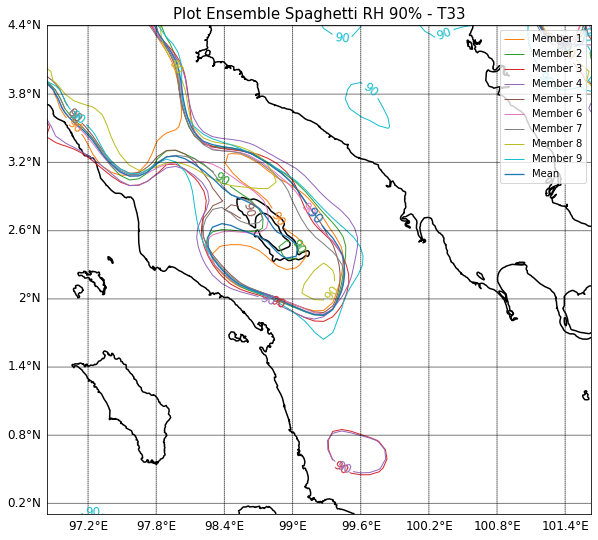

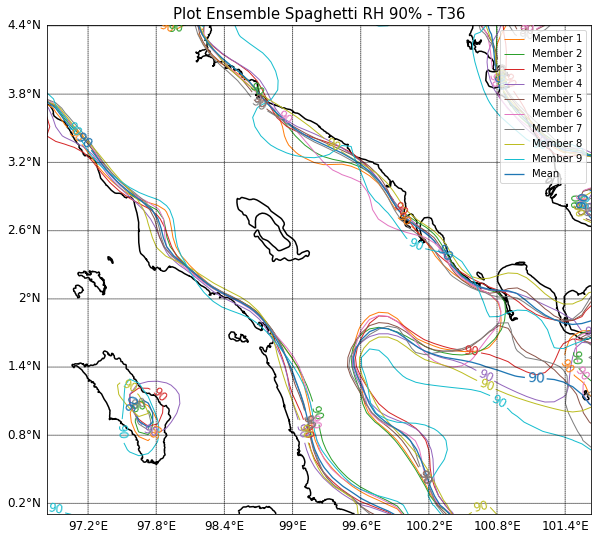

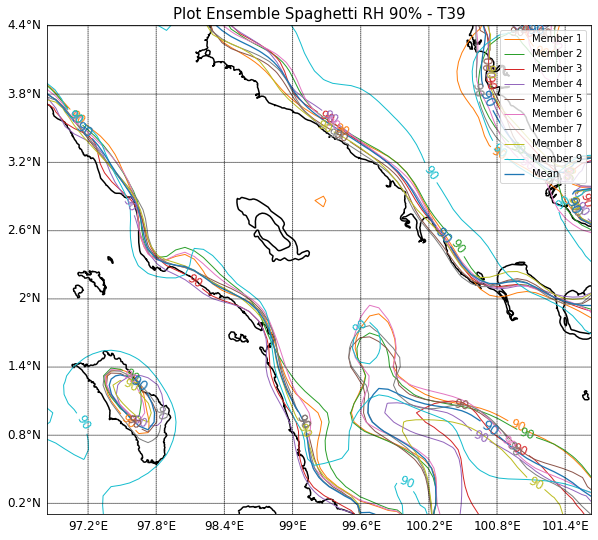

In [9]:
for time in np.arange (33,42,3):
    xx=int(time)
    td11 = getvar(file1,"rh2",xx)
    td12 = getvar(file2,"rh2",xx)
    td13 = getvar(file3,"rh2",xx)
    td14 = getvar(file4,"rh2",xx)
    td21 = getvar(file5,"rh2",xx)
    td22 = getvar(file6,"rh2",xx)
    td23 = getvar(file7,"rh2",xx)
    td31 = getvar(file8,"rh2",xx)
    td32 = getvar(file9,"rh2",xx)
    
    data=np.empty([9,54,60])              
    data[0,:,:]=td11
    data[1,:,:]=td12
    data[2,:,:]=td13
    data[3,:,:]=td14
    data[4,:,:]=td21
    data[5,:,:]=td22
    data[6,:,:]=td23
    data[7,:,:]=td31
    data[8,:,:]=td32

    Td = np.nanmean(data,axis=0)
    
    td1 = smooth2d(td11,10)
    td2 = smooth2d(td12,10)
    td3 = smooth2d(td13,10)
    td4 = smooth2d(td14,10)
    td5 = smooth2d(td21,10)
    td6 = smooth2d(td22,10)
    td7 = smooth2d(td23,10)
    td8 = smooth2d(td31,10)
    td9 = smooth2d(td32,10)
    td10= smooth2d(Td,10)
    
    swd = getvar(file1, "td2",xx)
    lats, lons = latlon_coords(swd)
    bm = get_basemap(swd,resolution='h')
    
    fig = plt.figure(figsize=(12,9))

    parallels = np.arange(-1,5, 0.6)
    meridians = np.arange(96,102, 0.6)

    bm.drawparallels(parallels,labels=[1,0,0,0],fontsize=12,color='black')
    bm.drawmeridians(meridians,labels=[0,0,0,1],fontsize=12,color='black')
    
    bm.drawcoastlines(linewidth=1.5)
    bm.drawstates(linewidth=2.5)
    bm.drawcountries(linewidth=2.5)
    
    x, y = bm(to_np(lons), to_np(lats))
    
    lev=[90]

    a = bm.contour(x, y, td1,lev,colors='C1',linewidths=1,label='member 1')
    b = bm.contour(x, y, td2,lev,colors='C2',linewidths=1,label='member 2')
    c = bm.contour(x, y, td3,lev,colors='C3',linewidths=1,label='member 3')
    d = bm.contour(x, y, td4,lev,colors='C4',linewidths=1,label='member 4')
    e = bm.contour(x, y, td5,lev,colors='C5',linewidths=1,label='member 5')
    f = bm.contour(x, y, td6,lev,colors='C6',linewidths=1,label='member 6')
    g = bm.contour(x, y, td7,lev,colors='C7',linewidths=1,label='member 7')
    i = bm.contour(x, y, td8,lev,colors='C8',linewidths=1,label='member 8')
    j = bm.contour(x, y, td9,lev,colors='C9',linewidths=1,label='member 9')
    h = bm.contour(x, y, td10,lev,colors='C10',linewidths=1.3,label='mean')

    plt.clabel(a, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(b, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(c, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(d, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(e, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(f, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(g, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(i, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(j, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(h, inline=1, fontsize=14, fmt="%1.0f")
    
    h1,_ = a.legend_elements()
    h2,_ = b.legend_elements()
    h3,_ = c.legend_elements()
    h4,_ = d.legend_elements()
    h5,_ = e.legend_elements()
    h6,_ = f.legend_elements()
    h7,_ = g.legend_elements()
    h9,_ = i.legend_elements()
    h10,_ = j.legend_elements()
    h8,_ = h.legend_elements()
    plt.legend([h1[0], h2[0], h3[0], h4[0], h5[0], h6[0], h7[0], h9[0], h10[0], h8[0]],
               ['Member 1', 'Member 2','Member 3','Member 4','Member 5','Member 6','Member 7','Member 8','Member 9','Mean'], fontsize=10, 
               loc='upper right')

    
    plt.title("Plot Ensemble Spaghetti RH 90% - T" + str(xx), size=15)
    plt.show()
    fig.savefig('RH90-t'+str(xx) +'.png')

<ipython-input-10-ba6f828e9dc7>:57: UserWarning: The following kwargs were not used by contour: 'label'
  a = bm.contour(x, y, td1,lev,colors='C1',linewidths=1,label='member 1')
<ipython-input-10-ba6f828e9dc7>:58: UserWarning: The following kwargs were not used by contour: 'label'
  b = bm.contour(x, y, td2,lev,colors='C2',linewidths=1,label='member 2')
<ipython-input-10-ba6f828e9dc7>:59: UserWarning: The following kwargs were not used by contour: 'label'
  c = bm.contour(x, y, td3,lev,colors='C3',linewidths=1,label='member 3')
<ipython-input-10-ba6f828e9dc7>:60: UserWarning: The following kwargs were not used by contour: 'label'
  d = bm.contour(x, y, td4,lev,colors='C4',linewidths=1,label='member 4')
<ipython-input-10-ba6f828e9dc7>:61: UserWarning: The following kwargs were not used by contour: 'label'
  e = bm.contour(x, y, td5,lev,colors='C5',linewidths=1,label='member 5')
<ipython-input-10-ba6f828e9dc7>:62: UserWarning: The following kwargs were not used by contour: 'label'
  f = 

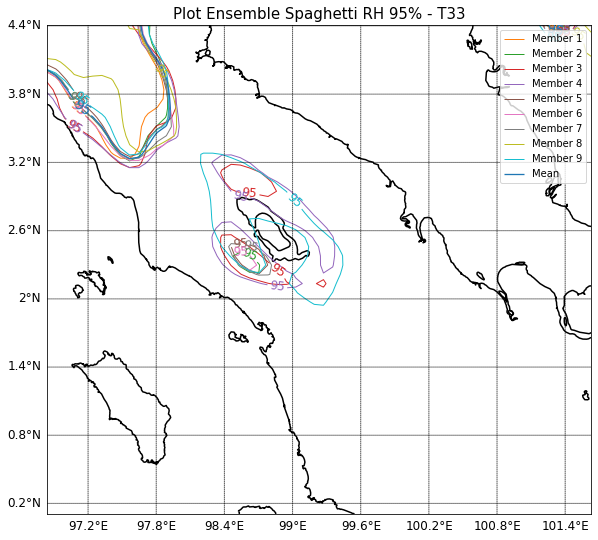

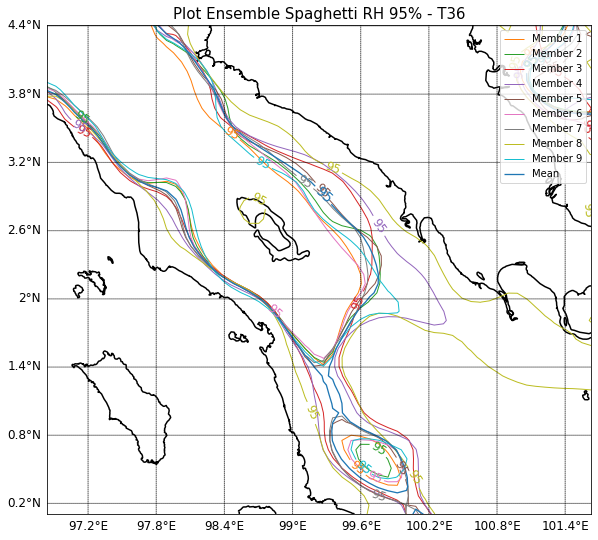

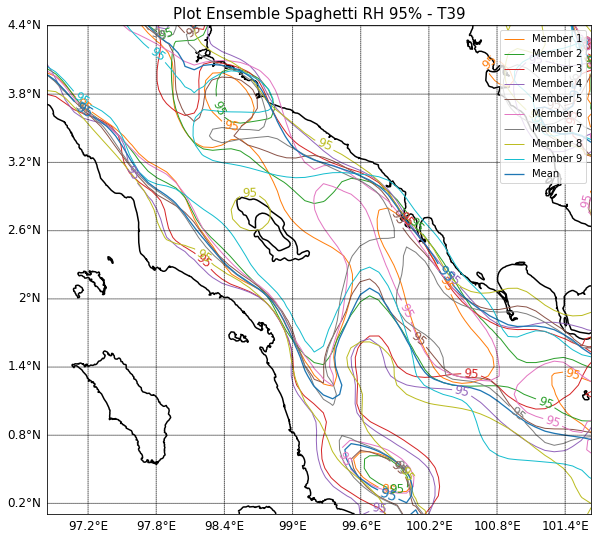

In [10]:
for time in np.arange (33,42,3):
    xx=int(time)
    td11 = getvar(file1,"rh2",xx)
    td12 = getvar(file2,"rh2",xx)
    td13 = getvar(file3,"rh2",xx)
    td14 = getvar(file4,"rh2",xx)
    td21 = getvar(file5,"rh2",xx)
    td22 = getvar(file6,"rh2",xx)
    td23 = getvar(file7,"rh2",xx)
    td31 = getvar(file8,"rh2",xx)
    td32 = getvar(file9,"rh2",xx)
    
    data=np.empty([9,54,60])              
    data[0,:,:]=td11
    data[1,:,:]=td12
    data[2,:,:]=td13
    data[3,:,:]=td14
    data[4,:,:]=td21
    data[5,:,:]=td22
    data[6,:,:]=td23
    data[7,:,:]=td31
    data[8,:,:]=td32

    Td = np.nanmean(data,axis=0)
    
    td1 = smooth2d(td11,10)
    td2 = smooth2d(td12,10)
    td3 = smooth2d(td13,10)
    td4 = smooth2d(td14,10)
    td5 = smooth2d(td21,10)
    td6 = smooth2d(td22,10)
    td7 = smooth2d(td23,10)
    td8 = smooth2d(td31,10)
    td9 = smooth2d(td32,10)
    td10= smooth2d(Td,10)
    
    swd = getvar(file1, "td2",xx)
    lats, lons = latlon_coords(swd)
    bm = get_basemap(swd,resolution='h')
    
    fig = plt.figure(figsize=(12,9))

    parallels = np.arange(-1,5, 0.6)
    meridians = np.arange(96,102, 0.6)

    bm.drawparallels(parallels,labels=[1,0,0,0],fontsize=12,color='black')
    bm.drawmeridians(meridians,labels=[0,0,0,1],fontsize=12,color='black')
    
    bm.drawcoastlines(linewidth=1.5)
    bm.drawstates(linewidth=2.5)
    bm.drawcountries(linewidth=2.5)
    
    x, y = bm(to_np(lons), to_np(lats))
    
    lev=[95]

    a = bm.contour(x, y, td1,lev,colors='C1',linewidths=1,label='member 1')
    b = bm.contour(x, y, td2,lev,colors='C2',linewidths=1,label='member 2')
    c = bm.contour(x, y, td3,lev,colors='C3',linewidths=1,label='member 3')
    d = bm.contour(x, y, td4,lev,colors='C4',linewidths=1,label='member 4')
    e = bm.contour(x, y, td5,lev,colors='C5',linewidths=1,label='member 5')
    f = bm.contour(x, y, td6,lev,colors='C6',linewidths=1,label='member 6')
    g = bm.contour(x, y, td7,lev,colors='C7',linewidths=1,label='member 7')
    i = bm.contour(x, y, td8,lev,colors='C8',linewidths=1,label='member 8')
    j = bm.contour(x, y, td9,lev,colors='C9',linewidths=1,label='member 9')
    h = bm.contour(x, y, td10,lev,colors='C10',linewidths=1.3,label='mean')

    plt.clabel(a, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(b, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(c, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(d, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(e, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(f, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(g, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(i, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(j, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(h, inline=1, fontsize=14, fmt="%1.0f")
    
    h1,_ = a.legend_elements()
    h2,_ = b.legend_elements()
    h3,_ = c.legend_elements()
    h4,_ = d.legend_elements()
    h5,_ = e.legend_elements()
    h6,_ = f.legend_elements()
    h7,_ = g.legend_elements()
    h9,_ = i.legend_elements()
    h10,_ = j.legend_elements()
    h8,_ = h.legend_elements()
    plt.legend([h1[0], h2[0], h3[0], h4[0], h5[0], h6[0], h7[0], h9[0], h10[0], h8[0]],
               ['Member 1', 'Member 2','Member 3','Member 4','Member 5','Member 6','Member 7','Member 8','Member 9','Mean'], fontsize=10, 
               loc='upper right')

    
    plt.title("Plot Ensemble Spaghetti RH 95% - T" + str(xx), size=15)
    plt.show()
    fig.savefig('RH95-t'+str(xx) +'.png')

# TEMPERATUR

In [6]:
xx = 39
swd = getvar(file1, "T2",xx) - 273.15
swd

<xarray.DataArray 'T2' (south_north: 54, west_east: 60)>
array([[26.787415, 26.681091, 26.600739, ..., 22.616669, 22.795654,
        22.22644 ],
       [26.91455 , 26.839813, 26.793518, ..., 22.369507, 22.499176,
        22.669708],
       [27.045197, 27.00003 , 26.988068, ..., 22.324768, 22.377228,
        22.121307],
       ...,
       [17.530823, 17.317352, 17.231873, ..., 19.666382, 18.987122,
        18.886017],
       [16.489166, 16.2471  , 17.225952, ..., 19.317291, 18.186615,
        17.346832],
       [16.15091 , 16.37558 , 17.116364, ..., 18.800781, 17.94397 ,
        18.343872]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 96.83 96.92 97.0 ... 101.5 101.6
    XLAT     (south_north, west_east) float32 0.1036 0.1036 ... 4.406 4.406
    XTIME    float32 2.34e+03
    Time     datetime64[ns] 2020-12-03T15:00:00
Dimensions without coordinates: south_north, west_east

(9, 73, 54, 60)
(73, 54, 60)


<ipython-input-20-1cd2d80ea84f>:40: UserWarning: The following kwargs were not used by contour: 'label'
  a = bm.contour(x, y, to_np(t1[xx,:,:]),lev,colors='C1',linewidths=1,label='member 1')
<ipython-input-20-1cd2d80ea84f>:41: UserWarning: The following kwargs were not used by contour: 'label'
  b = bm.contour(x, y, to_np(t2[xx,:,:]),lev,colors='C2',linewidths=1,label='member 2')
<ipython-input-20-1cd2d80ea84f>:42: UserWarning: The following kwargs were not used by contour: 'label'
  c = bm.contour(x, y, to_np(t3[xx,:,:]),lev,colors='C3',linewidths=1,label='member 3')
<ipython-input-20-1cd2d80ea84f>:43: UserWarning: The following kwargs were not used by contour: 'label'
  d = bm.contour(x, y, to_np(t4[xx,:,:]),lev,colors='C4',linewidths=1,label='member 4')
<ipython-input-20-1cd2d80ea84f>:44: UserWarning: The following kwargs were not used by contour: 'label'
  e = bm.contour(x, y, to_np(t5[xx,:,:]),lev,colors='C5',linewidths=1,label='member 5')
<ipython-input-20-1cd2d80ea84f>:45: User

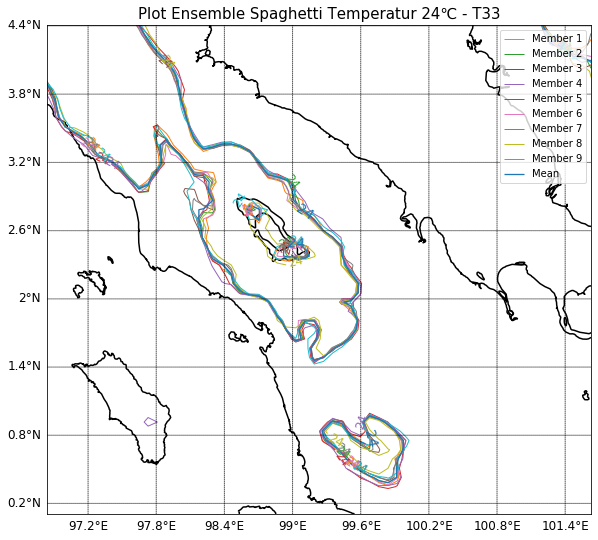

(9, 73, 54, 60)
(73, 54, 60)


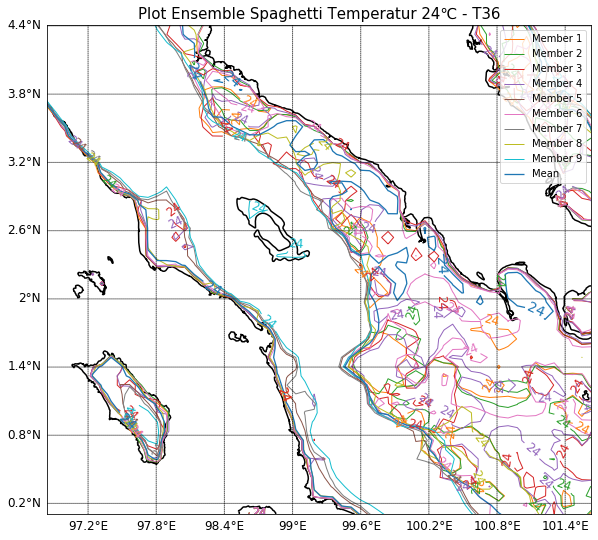

(9, 73, 54, 60)
(73, 54, 60)


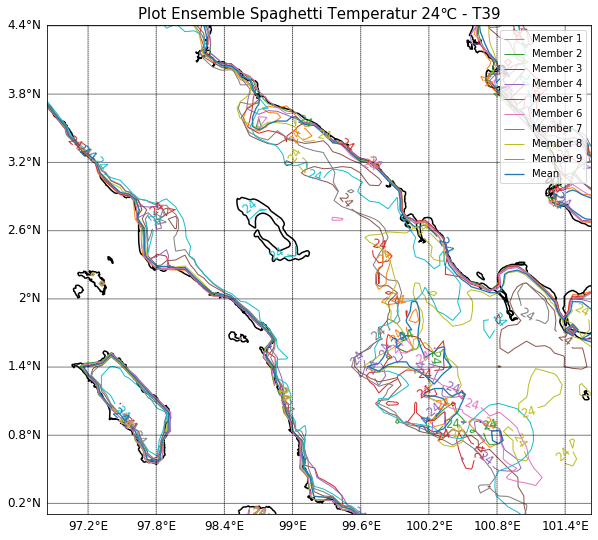

In [20]:
for time in np.arange (33,42,3):
    xx = int(time)
    t1 = file1.variables["T2"][0:73,:,:]  ; t1 = t1 - 273.15
    t2 = file2.variables["T2"][0:73,:,:]  ; t2 = t2 - 273.15
    t3 = file3.variables["T2"][0:73,:,:]  ; t3 = t3 - 273.15
    t4 = file4.variables["T2"][0:73,:,:]  ; t4 = t4 - 273.15
    t5 = file5.variables["T2"][0:73,:,:]  ; t5 = t5 - 273.15
    t6 = file6.variables["T2"][0:73,:,:]  ; t6 = t6 - 273.15
    t7 = file7.variables["T2"][0:73,:,:]  ; t7 = t7 - 273.15
    t8 = file8.variables["T2"][0:73,:,:]  ; t8 = t8 - 273.15
    t9 = file9.variables["T2"][0:73,:,:]  ; t9 = t9 - 273.15
    
    ens = np.stack((t1,t2,t3,t4,t5,t6,t7,t8,t9))
    print(ens.shape)
    ens_std = np.std(ens,axis=0)
    print(ens_std.shape)
    ens_mean = np.mean(ens,axis=0)
    
    swd = getvar(file1, "T2",xx)
    lats, lons = latlon_coords(swd)
    bm = get_basemap(swd,resolution='h')
    
    fig = plt.figure(figsize=(12,9))
    
    parallels = np.arange(-1,5, 0.6)
    meridians = np.arange(96,102, 0.6)

    bm.drawparallels(parallels,labels=[1,0,0,0],fontsize=12,color='black')
    bm.drawmeridians(meridians,labels=[0,0,0,1],fontsize=12,color='black')
    
    bm.drawcoastlines(linewidth=1.5)
    bm.drawstates(linewidth=2.5)
    bm.drawcountries(linewidth=2.5)
    #bm.shadedrelief()
    
    x, y = bm(to_np(lons),to_np(lats))
    
    lev=[24]

    a = bm.contour(x, y, to_np(t1[xx,:,:]),lev,colors='C1',linewidths=1,label='member 1')
    b = bm.contour(x, y, to_np(t2[xx,:,:]),lev,colors='C2',linewidths=1,label='member 2')
    c = bm.contour(x, y, to_np(t3[xx,:,:]),lev,colors='C3',linewidths=1,label='member 3')
    d = bm.contour(x, y, to_np(t4[xx,:,:]),lev,colors='C4',linewidths=1,label='member 4')
    e = bm.contour(x, y, to_np(t5[xx,:,:]),lev,colors='C5',linewidths=1,label='member 5')
    f = bm.contour(x, y, to_np(t6[xx,:,:]),lev,colors='C6',linewidths=1,label='member 6')
    g = bm.contour(x, y, to_np(t7[xx,:,:]),lev,colors='C7',linewidths=1,label='member 7')
    h = bm.contour(x, y, to_np(t8[xx,:,:]),lev,colors='C8',linewidths=1,label='member 8')
    i = bm.contour(x, y, to_np(t9[xx,:,:]),lev,colors='C9',linewidths=1,label='member 9')
    j = bm.contour(x, y, to_np(ens_mean[xx,:,:]),lev,colors='C10',linewidths=1.3,label='mean')

    plt.clabel(a, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(b, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(c, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(d, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(e, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(f, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(g, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(h, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(i, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(j, inline=1, fontsize=14, fmt="%1.0f")
    
    h1,_ = a.legend_elements()
    h2,_ = b.legend_elements()
    h3,_ = c.legend_elements()
    h4,_ = d.legend_elements()
    h5,_ = e.legend_elements()
    h6,_ = f.legend_elements()
    h7,_ = g.legend_elements()
    h8,_ = h.legend_elements()
    h9,_ = i.legend_elements()
    h10,_ = j.legend_elements()
    plt.legend([h1[0], h2[0], h3[0], h4[0], h5[0], h6[0], h7[0], h8[0], h9[0], h10[0]],
               ['Member 1', 'Member 2','Member 3','Member 4','Member 5','Member 6','Member 7','Member 8','Member 9','Mean'], fontsize=10, 
               loc='upper right')

    
    plt.title("Plot Ensemble Spaghetti Temperatur 24℃ - T" + str(xx), size=15)
    plt.show()
    fig.savefig('temp24-t'+str(xx) +'.png')

(9, 73, 54, 60)
(73, 54, 60)


<ipython-input-193-d443a70e8b2a>:39: UserWarning: The following kwargs were not used by contour: 'label'
  a = bm.contour(x, y, to_np(t1[xx,:,:]),lev,colors='C1',linewidths=1,label='member 1')
<ipython-input-193-d443a70e8b2a>:40: UserWarning: The following kwargs were not used by contour: 'label'
  b = bm.contour(x, y, to_np(t2[xx,:,:]),lev,colors='C2',linewidths=1,label='member 2')
<ipython-input-193-d443a70e8b2a>:41: UserWarning: The following kwargs were not used by contour: 'label'
  c = bm.contour(x, y, to_np(t3[xx,:,:]),lev,colors='C3',linewidths=1,label='member 3')
<ipython-input-193-d443a70e8b2a>:42: UserWarning: The following kwargs were not used by contour: 'label'
  d = bm.contour(x, y, to_np(t4[xx,:,:]),lev,colors='C4',linewidths=1,label='member 4')
<ipython-input-193-d443a70e8b2a>:43: UserWarning: The following kwargs were not used by contour: 'label'
  e = bm.contour(x, y, to_np(t5[xx,:,:]),lev,colors='C5',linewidths=1,label='member 5')
<ipython-input-193-d443a70e8b2a>:44

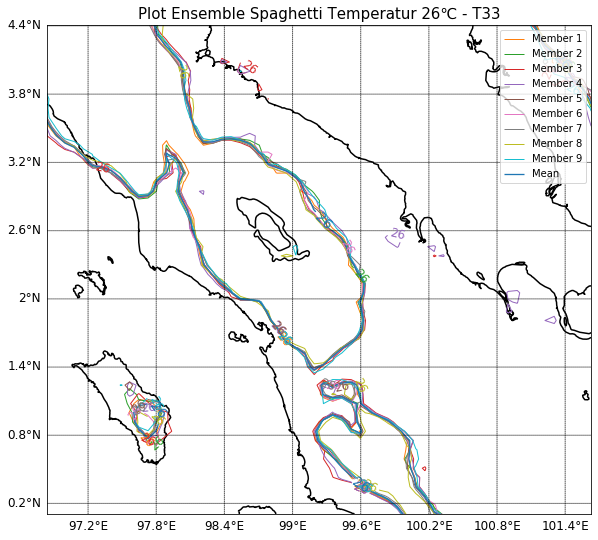

(9, 73, 54, 60)
(73, 54, 60)


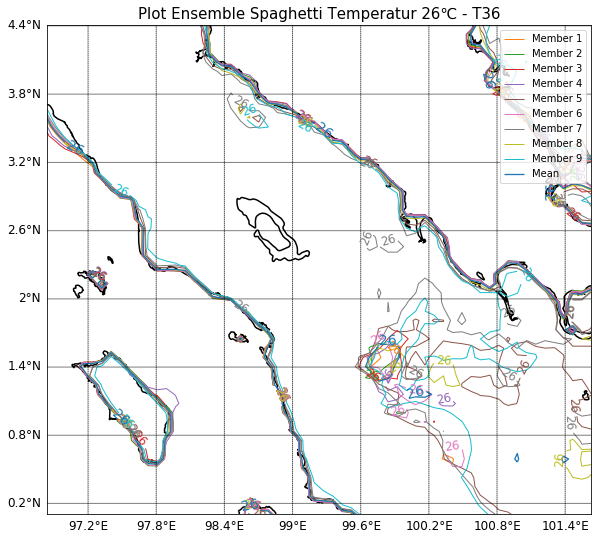

(9, 73, 54, 60)
(73, 54, 60)


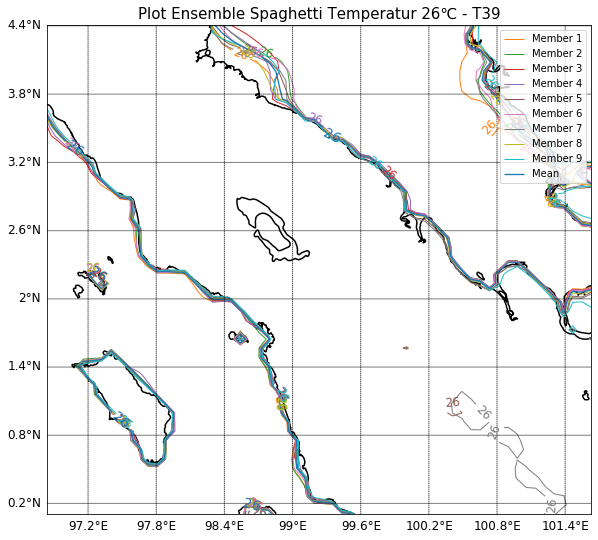

In [193]:
for time in np.arange (33,42,3):
    xx = int(time)
    t1 = file1.variables["T2"][0:73,:,:]  ; t1 = t1 - 273.15
    t2 = file2.variables["T2"][0:73,:,:]  ; t2 = t2 - 273.15
    t3 = file3.variables["T2"][0:73,:,:]  ; t3 = t3 - 273.15
    t4 = file4.variables["T2"][0:73,:,:]  ; t4 = t4 - 273.15
    t5 = file5.variables["T2"][0:73,:,:]  ; t5 = t5 - 273.15
    t6 = file6.variables["T2"][0:73,:,:]  ; t6 = t6 - 273.15
    t7 = file7.variables["T2"][0:73,:,:]  ; t7 = t7 - 273.15
    t8 = file8.variables["T2"][0:73,:,:]  ; t8 = t8 - 273.15
    t9 = file9.variables["T2"][0:73,:,:]  ; t9 = t9 - 273.15
    
    ens = np.stack((t1,t2,t3,t4,t5,t6,t7,t8,t9))
    print(ens.shape)
    ens_std = np.std(ens,axis=0)
    print(ens_std.shape)
    ens_mean = np.mean(ens,axis=0)
    
    swd = getvar(file1, "T2",xx)
    lats, lons = latlon_coords(swd)
    bm = get_basemap(swd,resolution='h')
    
    fig = plt.figure(figsize=(12,9))
    
    parallels = np.arange(-1,5, 0.6)
    meridians = np.arange(96,102, 0.6)

    bm.drawparallels(parallels,labels=[1,0,0,0],fontsize=12,color='black')
    bm.drawmeridians(meridians,labels=[0,0,0,1],fontsize=12,color='black')
    
    bm.drawcoastlines(linewidth=1.5)
    bm.drawstates(linewidth=2.5)
    bm.drawcountries(linewidth=2.5)
    
    x, y = bm(to_np(lons),to_np(lats))
    
    lev=[26]

    a = bm.contour(x, y, to_np(t1[xx,:,:]),lev,colors='C1',linewidths=1,label='member 1')
    b = bm.contour(x, y, to_np(t2[xx,:,:]),lev,colors='C2',linewidths=1,label='member 2')
    c = bm.contour(x, y, to_np(t3[xx,:,:]),lev,colors='C3',linewidths=1,label='member 3')
    d = bm.contour(x, y, to_np(t4[xx,:,:]),lev,colors='C4',linewidths=1,label='member 4')
    e = bm.contour(x, y, to_np(t5[xx,:,:]),lev,colors='C5',linewidths=1,label='member 5')
    f = bm.contour(x, y, to_np(t6[xx,:,:]),lev,colors='C6',linewidths=1,label='member 6')
    g = bm.contour(x, y, to_np(t7[xx,:,:]),lev,colors='C7',linewidths=1,label='member 7')
    h = bm.contour(x, y, to_np(t8[xx,:,:]),lev,colors='C8',linewidths=1,label='member 8')
    i = bm.contour(x, y, to_np(t9[xx,:,:]),lev,colors='C9',linewidths=1,label='member 9')
    j = bm.contour(x, y, to_np(ens_mean[xx,:,:]),lev,colors='C10',linewidths=1.3,label='mean')

    plt.clabel(a, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(b, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(c, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(d, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(e, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(f, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(g, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(h, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(i, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(j, inline=1, fontsize=14, fmt="%1.0f")
    
    h1,_ = a.legend_elements()
    h2,_ = b.legend_elements()
    h3,_ = c.legend_elements()
    h4,_ = d.legend_elements()
    h5,_ = e.legend_elements()
    h6,_ = f.legend_elements()
    h7,_ = g.legend_elements()
    h8,_ = h.legend_elements()
    h9,_ = i.legend_elements()
    h10,_ = j.legend_elements()
    plt.legend([h1[0], h2[0], h3[0], h4[0], h5[0], h6[0], h7[0], h8[0], h9[0], h10[0]],
               ['Member 1', 'Member 2','Member 3','Member 4','Member 5','Member 6','Member 7','Member 8','Member 9','Mean'], fontsize=10, 
               loc='upper right')

    
    plt.title("Plot Ensemble Spaghetti Temperatur 26℃ - T" + str(xx), size=15)
    plt.show()
    fig.savefig('temp26-t'+str(xx) +'.png')

<ipython-input-7-6b33714904a4>:74: UserWarning: No contour levels were found within the data range.
  atemp=bm.contour(x,y,Temp11,lev1,colors='red',linewidths=1)
<ipython-input-7-6b33714904a4>:75: UserWarning: No contour levels were found within the data range.
  btemp=bm.contour(x,y,Temp12,lev1,colors='red',linewidths=1)
<ipython-input-7-6b33714904a4>:76: UserWarning: No contour levels were found within the data range.
  ctemp=bm.contour(x,y,Temp13,lev1,colors='red',linewidths=1)
<ipython-input-7-6b33714904a4>:77: UserWarning: No contour levels were found within the data range.
  dtemp=bm.contour(x,y,Temp14,lev1,colors='red',linewidths=1)
<ipython-input-7-6b33714904a4>:78: UserWarning: No contour levels were found within the data range.
  etemp=bm.contour(x,y,Temp21,lev1,colors='red',linewidths=1)
<ipython-input-7-6b33714904a4>:79: UserWarning: No contour levels were found within the data range.
  ftemp=bm.contour(x,y,Temp22,lev1,colors='red',linewidths=1)
<ipython-input-7-6b33714904a

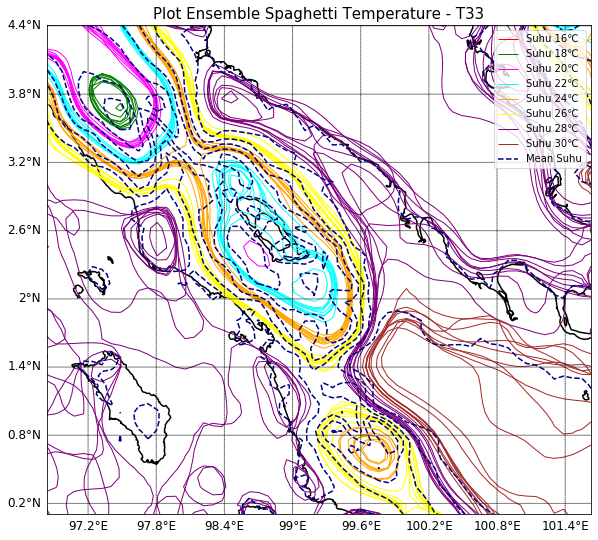

<ipython-input-7-6b33714904a4>:144: UserWarning: No contour levels were found within the data range.
  bp=bm.contour(x,y,Temp11,lev8,colors='brown',linewidths=1)
<ipython-input-7-6b33714904a4>:145: UserWarning: No contour levels were found within the data range.
  bq=bm.contour(x,y,Temp12,lev8,colors='brown',linewidths=1)
<ipython-input-7-6b33714904a4>:146: UserWarning: No contour levels were found within the data range.
  br=bm.contour(x,y,Temp13,lev8,colors='brown',linewidths=1)
<ipython-input-7-6b33714904a4>:147: UserWarning: No contour levels were found within the data range.
  bs=bm.contour(x,y,Temp14,lev8,colors='brown',linewidths=1)
<ipython-input-7-6b33714904a4>:148: UserWarning: No contour levels were found within the data range.
  bt=bm.contour(x,y,Temp21,lev8,colors='brown',linewidths=1)
<ipython-input-7-6b33714904a4>:149: UserWarning: No contour levels were found within the data range.
  bu=bm.contour(x,y,Temp22,lev8,colors='brown',linewidths=1)
<ipython-input-7-6b33714904a

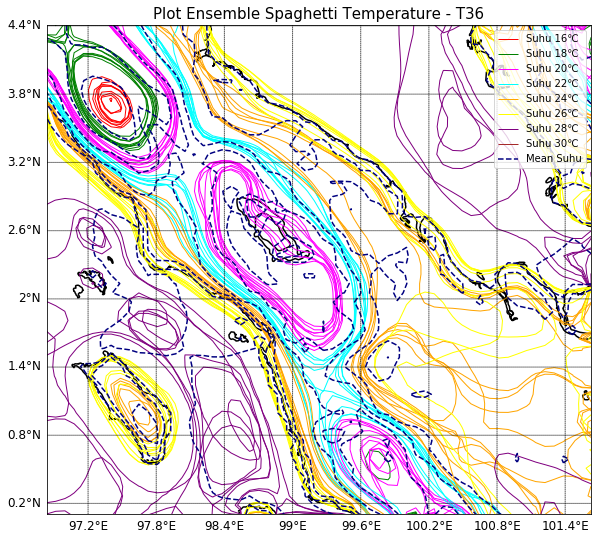

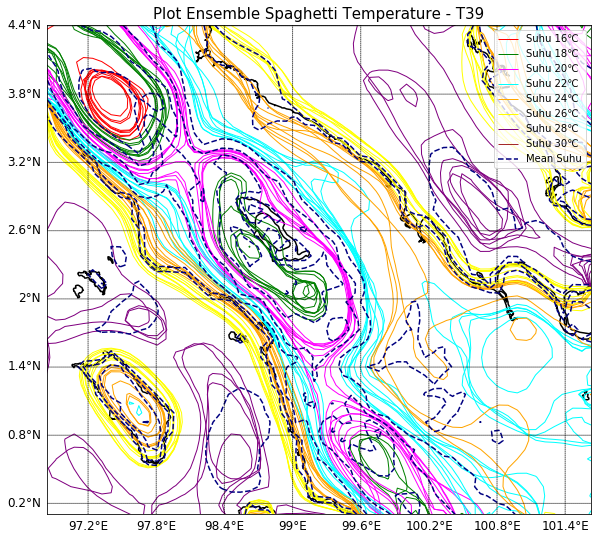

In [7]:
for time in np.arange (33,42,3):
    xx = int(time)
    T11 = getvar(file1,"T2",xx)
    T12 = getvar(file2,"T2",xx)
    T13 = getvar(file3,"T2",xx)
    T14 = getvar(file4,"T2",xx)
    T21 = getvar(file5,"T2",xx)
    T22 = getvar(file6,"T2",xx)
    T23 = getvar(file7,"T2",xx)
    T31 = getvar(file8,"T2",xx)
    T32 = getvar(file9,"T2",xx)
    
    data=np.empty([9,54,60])              
    data[0,:,:]=T11
    data[1,:,:]=T12
    data[2,:,:]=T13
    data[3,:,:]=T14
    data[4,:,:]=T21
    data[5,:,:]=T22
    data[6,:,:]=T23
    data[7,:,:]=T31
    data[8,:,:]=T32

    Tmp = np.nanmean(data,axis=0)
    Temp = Tmp-273.15
    
    Temp11 = smooth2d((T11 - 273.15),10)
    Temp12 = smooth2d((T12 - 273.15),10)
    Temp13 = smooth2d((T13 - 273.15),10)
    Temp14 = smooth2d((T14 - 273.15),10)
    Temp21 = smooth2d((T21 - 273.15),10)
    Temp22 = smooth2d((T22 - 273.15),10)
    Temp23 = smooth2d((T23 - 273.15),10)
    Temp31 = smooth2d((T31 - 273.15),10)
    Temp32 = smooth2d((T32 - 273.15),10)

    # Smooth the sea level pressure since it tends to be noisy near the mountains
    smoothT = smooth2d(Temp, 3)

    # Get the latitude and longitude points
    lats, lons = latlon_coords(T11)

    # Get the basemap object
    bm = get_basemap(T11, resolution = 'h')

    # Create a figure
    fig = plt.figure(figsize=(12,9))

    parallels = np.arange(-1,5, 0.6)
    meridians = np.arange(96,102, 0.6)

    bm.drawparallels(parallels,labels=[1,0,0,0],fontsize=12,color='black')
    bm.drawmeridians(meridians,labels=[0,0,0,1],fontsize=12,color='black')
    
    # Add geographic outlines
    bm.drawcoastlines(linewidth=1.5)
    bm.drawstates(linewidth=2)
    bm.drawcountries(linewidth=2)

    # Convert the lats and lons to x and y.  Make sure you convert the lats and lons to
    # numpy arrays via to_np, or basemap crashes with an undefined RuntimeError.
    x, y = bm(to_np(lons), to_np(lats))

    lev1=[16]
    lev2=[18]
    lev3=[20]
    lev4=[22]
    lev5=[24]
    lev6=[26]
    lev7=[28]
    lev8=[30]
    lev=[16,18,20,22,24,26,28,30]
    
    atemp=bm.contour(x,y,Temp11,lev1,colors='red',linewidths=1)
    btemp=bm.contour(x,y,Temp12,lev1,colors='red',linewidths=1)
    ctemp=bm.contour(x,y,Temp13,lev1,colors='red',linewidths=1)
    dtemp=bm.contour(x,y,Temp14,lev1,colors='red',linewidths=1)
    etemp=bm.contour(x,y,Temp21,lev1,colors='red',linewidths=1)
    ftemp=bm.contour(x,y,Temp22,lev1,colors='red',linewidths=1)
    gtemp=bm.contour(x,y,Temp23,lev1,colors='red',linewidths=1)
    htemp=bm.contour(x,y,Temp31,lev1,colors='red',linewidths=1)
    itemp=bm.contour(x,y,Temp32,lev1,colors='red',linewidths=1)
    
    jtemp=bm.contour(x,y,Temp11,lev2,colors='green',linewidths=1)
    ktemp=bm.contour(x,y,Temp12,lev2,colors='green',linewidths=1)
    ltemp=bm.contour(x,y,Temp13,lev2,colors='green',linewidths=1)
    mtemp=bm.contour(x,y,Temp14,lev2,colors='green',linewidths=1)
    ntemp=bm.contour(x,y,Temp21,lev2,colors='green',linewidths=1)
    otemp=bm.contour(x,y,Temp22,lev2,colors='green',linewidths=1)
    ptemp=bm.contour(x,y,Temp23,lev2,colors='green',linewidths=1)
    qtemp=bm.contour(x,y,Temp31,lev2,colors='green',linewidths=1)
    rtemp=bm.contour(x,y,Temp32,lev2,colors='green',linewidths=1)
    
    stemp=bm.contour(x,y,Temp11,lev3,colors='magenta',linewidths=1)
    ttemp=bm.contour(x,y,Temp12,lev3,colors='magenta',linewidths=1)
    utemp=bm.contour(x,y,Temp13,lev3,colors='magenta',linewidths=1)
    vtemp=bm.contour(x,y,Temp14,lev3,colors='magenta',linewidths=1)
    wtemp=bm.contour(x,y,Temp21,lev3,colors='magenta',linewidths=1)
    ztemp=bm.contour(x,y,Temp22,lev3,colors='magenta',linewidths=1)
    aa=bm.contour(x,y,Temp23,lev3,colors='magenta',linewidths=1)
    ab=bm.contour(x,y,Temp31,lev3,colors='magenta',linewidths=1)
    ac=bm.contour(x,y,Temp32,lev3,colors='magenta',linewidths=1)
    
    ad=bm.contour(x,y,Temp11,lev4,colors='cyan',linewidths=1)
    ae=bm.contour(x,y,Temp12,lev4,colors='cyan',linewidths=1)
    af=bm.contour(x,y,Temp13,lev4,colors='cyan',linewidths=1)
    ag=bm.contour(x,y,Temp14,lev4,colors='cyan',linewidths=1)
    ah=bm.contour(x,y,Temp21,lev4,colors='cyan',linewidths=1)
    ai=bm.contour(x,y,Temp22,lev4,colors='cyan',linewidths=1)
    aj=bm.contour(x,y,Temp23,lev4,colors='cyan',linewidths=1)
    ak=bm.contour(x,y,Temp31,lev4,colors='cyan',linewidths=1)
    al=bm.contour(x,y,Temp32,lev4,colors='cyan',linewidths=1)
    
    am=bm.contour(x,y,Temp11,lev5,colors='orange',linewidths=1)
    an=bm.contour(x,y,Temp12,lev5,colors='orange',linewidths=1)
    ao=bm.contour(x,y,Temp13,lev5,colors='orange',linewidths=1)
    ap=bm.contour(x,y,Temp14,lev5,colors='orange',linewidths=1)
    aq=bm.contour(x,y,Temp21,lev5,colors='orange',linewidths=1)
    ar=bm.contour(x,y,Temp22,lev5,colors='orange',linewidths=1)
    at=bm.contour(x,y,Temp23,lev5,colors='orange',linewidths=1)
    au=bm.contour(x,y,Temp31,lev5,colors='orange',linewidths=1)
    av=bm.contour(x,y,Temp32,lev5,colors='orange',linewidths=1)
    
    aw=bm.contour(x,y,Temp11,lev6,colors='yellow',linewidths=1)
    ax=bm.contour(x,y,Temp12,lev6,colors='yellow',linewidths=1)
    ay=bm.contour(x,y,Temp13,lev6,colors='yellow',linewidths=1)
    az=bm.contour(x,y,Temp14,lev6,colors='yellow',linewidths=1)
    ba=bm.contour(x,y,Temp21,lev6,colors='yellow',linewidths=1)
    bb=bm.contour(x,y,Temp22,lev6,colors='yellow',linewidths=1)
    bc=bm.contour(x,y,Temp23,lev6,colors='yellow',linewidths=1)
    bd=bm.contour(x,y,Temp31,lev6,colors='yellow',linewidths=1)
    be=bm.contour(x,y,Temp32,lev6,colors='yellow',linewidths=1)
    
    bf=bm.contour(x,y,Temp11,lev7,colors='purple',linewidths=1)
    bg=bm.contour(x,y,Temp12,lev7,colors='purple',linewidths=1)
    bh=bm.contour(x,y,Temp13,lev7,colors='purple',linewidths=1)
    bi=bm.contour(x,y,Temp14,lev7,colors='purple',linewidths=1)
    bj=bm.contour(x,y,Temp21,lev7,colors='purple',linewidths=1)
    bk=bm.contour(x,y,Temp22,lev7,colors='purple',linewidths=1)
    bl=bm.contour(x,y,Temp23,lev7,colors='purple',linewidths=1)
    bn=bm.contour(x,y,Temp31,lev7,colors='purple',linewidths=1)
    bo=bm.contour(x,y,Temp32,lev7,colors='purple',linewidths=1)
    
    bp=bm.contour(x,y,Temp11,lev8,colors='brown',linewidths=1)
    bq=bm.contour(x,y,Temp12,lev8,colors='brown',linewidths=1)
    br=bm.contour(x,y,Temp13,lev8,colors='brown',linewidths=1)
    bs=bm.contour(x,y,Temp14,lev8,colors='brown',linewidths=1)
    bt=bm.contour(x,y,Temp21,lev8,colors='brown',linewidths=1)
    bu=bm.contour(x,y,Temp22,lev8,colors='brown',linewidths=1)
    bv=bm.contour(x,y,Temp23,lev8,colors='brown',linewidths=1)
    bw=bm.contour(x,y,Temp31,lev8,colors='brown',linewidths=1)
    bx=bm.contour(x,y,Temp32,lev8,colors='brown',linewidths=1)
    
    by=bm.contour(x,y,Temp,lev,linestyles='dashed',colors='navy',linewidths=1.5)

    atemp.collections[0].set_label('Suhu 16℃')
    jtemp.collections[0].set_label('Suhu 18℃')
    stemp.collections[0].set_label('Suhu 20℃')
    ad.collections[0].set_label('Suhu 22℃')
    am.collections[0].set_label('Suhu 24℃')
    aw.collections[0].set_label('Suhu 26℃')
    bf.collections[0].set_label('Suhu 28℃')
    bp.collections[0].set_label('Suhu 30℃')
    by.collections[0].set_label('Mean Suhu')
    
    plt.legend(loc='upper right')
    plt.title("Plot Ensemble Spaghetti Temperature - T" + str(xx), size=15)
    plt.show()

    fig.savefig('temp_'+str(xx) +'.png')

# GEOPOTENSIAL

In [174]:
#Pengambilan level
for time in range (14,15):
    Z11 = getvar(file1,"z",units='m',timeidx=xx)
    P11 = getvar(file1,"p",units='hpa',timeidx=xx)
    ht11_850 = interplevel(Z11, P11, 850).fillna(0)

    ht8=np.empty([10,54,60])              
    ht8[0,:,:]=ht11_850
    
ht8[0:43:22]

array([[[1498.87890625, 1498.61560059, 1498.49182129, ...,
         1499.30871582, 1499.49951172, 1499.33093262],
        [1498.49633789, 1498.65783691, 1498.68579102, ...,
         1499.21435547, 1499.35144043, 1500.31921387],
        [1498.32958984, 1498.59667969, 1498.69421387, ...,
         1499.31286621, 1499.30786133, 1499.97949219],
        ...,
        [1490.57531738, 1492.89953613, 1493.49975586, ...,
         1493.81188965, 1493.46606445, 1490.18688965],
        [   0.        ,    0.        ,    0.        , ...,
         1494.8425293 , 1493.87854004, 1496.3190918 ],
        [   0.        ,    0.        ,    0.        , ...,
         1504.28295898, 1493.40332031, 1498.85986328]]])

(9, 54, 60)
(54, 60)


<ipython-input-195-e2ceec80011c>:71: UserWarning: The following kwargs were not used by contour: 'label'
  a = bm.contour(x, y, to_np(ht8[0,:,:]),lev,colors='C1',linewidths=1,label='member 1')
<ipython-input-195-e2ceec80011c>:72: UserWarning: The following kwargs were not used by contour: 'label'
  b = bm.contour(x, y, to_np(ht8[1,:,:]),lev,colors='C2',linewidths=1,label='member 2')
<ipython-input-195-e2ceec80011c>:73: UserWarning: The following kwargs were not used by contour: 'label'
  c = bm.contour(x, y, to_np(ht8[2,:,:]),lev,colors='C3',linewidths=1,label='member 3')
<ipython-input-195-e2ceec80011c>:74: UserWarning: The following kwargs were not used by contour: 'label'
  d = bm.contour(x, y, to_np(ht8[3,:,:]),lev,colors='C4',linewidths=1,label='member 4')
<ipython-input-195-e2ceec80011c>:75: UserWarning: The following kwargs were not used by contour: 'label'
  e = bm.contour(x, y, to_np(ht8[4,:,:]),lev,colors='C5',linewidths=1,label='member 5')
<ipython-input-195-e2ceec80011c>:76

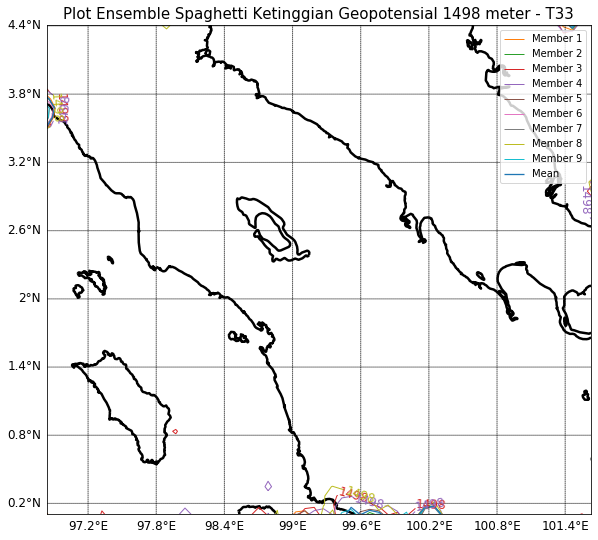

(9, 54, 60)
(54, 60)


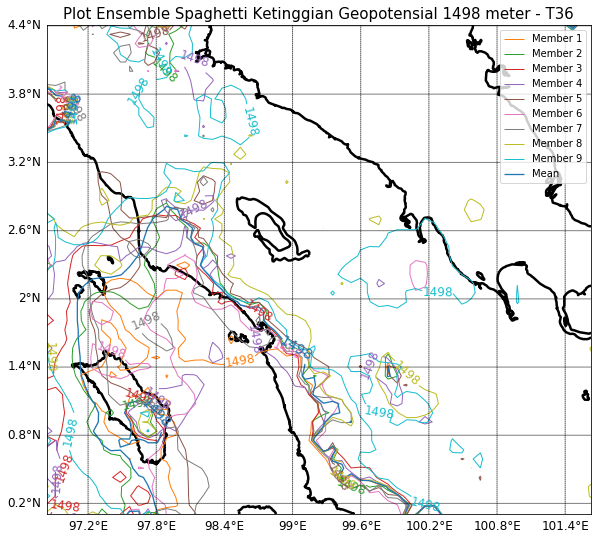

(9, 54, 60)
(54, 60)


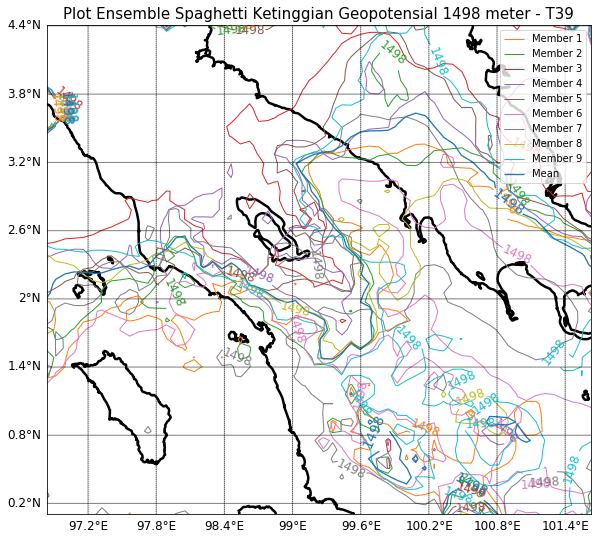

In [195]:
for time in np.arange (33,42,3):
    xx = int(time)
    Z11 = getvar(file1,"z",units='m',timeidx=xx)
    Z12 = getvar(file2,"z",units='m',timeidx=xx)
    Z13 = getvar(file3,"z",units='m',timeidx=xx)
    Z14 = getvar(file4,"z",units='m',timeidx=xx)
    Z21 = getvar(file5,"z",units='m',timeidx=xx)
    Z22 = getvar(file6,"z",units='m',timeidx=xx)
    Z23 = getvar(file7,"z",units='m',timeidx=xx)
    Z31 = getvar(file8,"z",units='m',timeidx=xx)
    Z32 = getvar(file9,"z",units='m',timeidx=xx)
    
    P11 = getvar(file1,"p",units='hpa',timeidx=xx)
    P12 = getvar(file2,"p",units='hpa',timeidx=xx)
    P13 = getvar(file3,"p",units='hpa',timeidx=xx)
    P14 = getvar(file4,"p",units='hpa',timeidx=xx)
    P21 = getvar(file5,"p",units='hpa',timeidx=xx)
    P22 = getvar(file6,"p",units='hpa',timeidx=xx)
    P23 = getvar(file7,"p",units='hpa',timeidx=xx)
    P31 = getvar(file8,"p",units='hpa',timeidx=xx)
    P32 = getvar(file9,"p",units='hpa',timeidx=xx)
    
    ht11_850 = interplevel(Z11, P11, 850).fillna(0)
    ht12_850 = interplevel(Z12, P12, 850).fillna(0)
    ht13_850 = interplevel(Z13, P13, 850).fillna(0)
    ht14_850 = interplevel(Z14, P14, 850).fillna(0)
    ht21_850 = interplevel(Z21, P21, 850).fillna(0)
    ht22_850 = interplevel(Z22, P22, 850).fillna(0)
    ht23_850 = interplevel(Z23, P23, 850).fillna(0)
    ht31_850 = interplevel(Z31, P31, 850).fillna(0)
    ht32_850 = interplevel(Z32, P32, 850).fillna(0)
    
    ens = np.stack((ht11_850,ht12_850,ht13_850,ht14_850,ht21_850,ht22_850,ht23_850,ht31_850,ht32_850))
    print(ens.shape)
    ens_std = np.std(ens,axis=0)
    print(ens_std.shape)
    ens_mean = np.mean(ens,axis=0)

    ht8=np.empty([10,54,60])              
    ht8[0,:,:]=ht11_850
    ht8[1,:,:]=ht12_850
    ht8[2,:,:]=ht13_850
    ht8[3,:,:]=ht14_850
    ht8[4,:,:]=ht21_850
    ht8[5,:,:]=ht22_850
    ht8[6,:,:]=ht23_850
    ht8[7,:,:]=ht31_850
    ht8[8,:,:]=ht32_850
    ht8[9,:,:]=ens_mean
    
    swd = getvar(file1, "p",xx)
    lats, lons = latlon_coords(swd)
    bm = get_basemap(swd,resolution='h')
    
    fig = plt.figure(figsize=(12,9))
    
    parallels = np.arange(-1,5, 0.6)
    meridians = np.arange(96,102, 0.6)

    bm.drawparallels(parallels,labels=[1,0,0,0],fontsize=12,color='black')
    bm.drawmeridians(meridians,labels=[0,0,0,1],fontsize=12,color='black')
    
    bm.drawcoastlines(linewidth=2.5)
    bm.drawstates(linewidth=2.5)
    bm.drawcountries(linewidth=2.5)
    
    x, y = bm(to_np(lons), to_np(lats))
    
    lev=[1498]

    a = bm.contour(x, y, to_np(ht8[0,:,:]),lev,colors='C1',linewidths=1,label='member 1')
    b = bm.contour(x, y, to_np(ht8[1,:,:]),lev,colors='C2',linewidths=1,label='member 2')
    c = bm.contour(x, y, to_np(ht8[2,:,:]),lev,colors='C3',linewidths=1,label='member 3')
    d = bm.contour(x, y, to_np(ht8[3,:,:]),lev,colors='C4',linewidths=1,label='member 4')
    e = bm.contour(x, y, to_np(ht8[4,:,:]),lev,colors='C5',linewidths=1,label='member 5')
    f = bm.contour(x, y, to_np(ht8[5,:,:]),lev,colors='C6',linewidths=1,label='member 6')
    g = bm.contour(x, y, to_np(ht8[6,:,:]),lev,colors='C7',linewidths=1,label='member 7')
    i = bm.contour(x, y, to_np(ht8[7,:,:]),lev,colors='C8',linewidths=1,label='member 8')
    j = bm.contour(x, y, to_np(ht8[8,:,:]),lev,colors='C9',linewidths=1,label='member 9')
    h = bm.contour(x, y, to_np(ht8[9,:,:]),lev,colors='C10',linewidths=1.3,label='mean')

    plt.clabel(a, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(b, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(c, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(d, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(e, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(f, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(g, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(i, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(j, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(h, inline=1, fontsize=14, fmt="%1.0f")
    
    h1,_ = a.legend_elements()
    h2,_ = b.legend_elements()
    h3,_ = c.legend_elements()
    h4,_ = d.legend_elements()
    h5,_ = e.legend_elements()
    h6,_ = f.legend_elements()
    h7,_ = g.legend_elements()
    h9,_ = i.legend_elements()
    h10,_ = j.legend_elements()
    h8,_ = h.legend_elements()
    plt.legend([h1[0], h2[0], h3[0], h4[0], h5[0], h6[0], h7[0], h9[0], h10[0],h8[0]],
               ['Member 1', 'Member 2','Member 3','Member 4','Member 5','Member 6','Member 7','Member 8','Member 9','Mean'], fontsize=10, 
               loc='upper right')

    
    plt.title("Plot Ensemble Spaghetti Ketinggian Geopotensial 1498 meter - T" + str(xx), size=15)
    plt.show()
    fig.savefig('geop1498-t'+str(xx) +'.png')

(9, 54, 60)
(54, 60)


<ipython-input-176-2f4d92f9758c>:71: UserWarning: The following kwargs were not used by contour: 'label'
  a = bm.contour(x, y, to_np(ht8[0,:,:]),lev,colors='C1',linewidths=1,label='member 1')
<ipython-input-176-2f4d92f9758c>:72: UserWarning: The following kwargs were not used by contour: 'label'
  b = bm.contour(x, y, to_np(ht8[1,:,:]),lev,colors='C2',linewidths=1,label='member 2')
<ipython-input-176-2f4d92f9758c>:73: UserWarning: The following kwargs were not used by contour: 'label'
  c = bm.contour(x, y, to_np(ht8[2,:,:]),lev,colors='C3',linewidths=1,label='member 3')
<ipython-input-176-2f4d92f9758c>:74: UserWarning: The following kwargs were not used by contour: 'label'
  d = bm.contour(x, y, to_np(ht8[3,:,:]),lev,colors='C4',linewidths=1,label='member 4')
<ipython-input-176-2f4d92f9758c>:75: UserWarning: The following kwargs were not used by contour: 'label'
  e = bm.contour(x, y, to_np(ht8[4,:,:]),lev,colors='C5',linewidths=1,label='member 5')
<ipython-input-176-2f4d92f9758c>:76

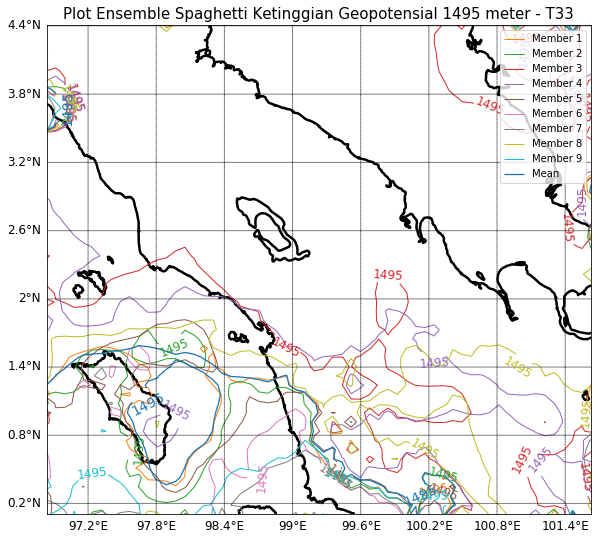

(9, 54, 60)
(54, 60)


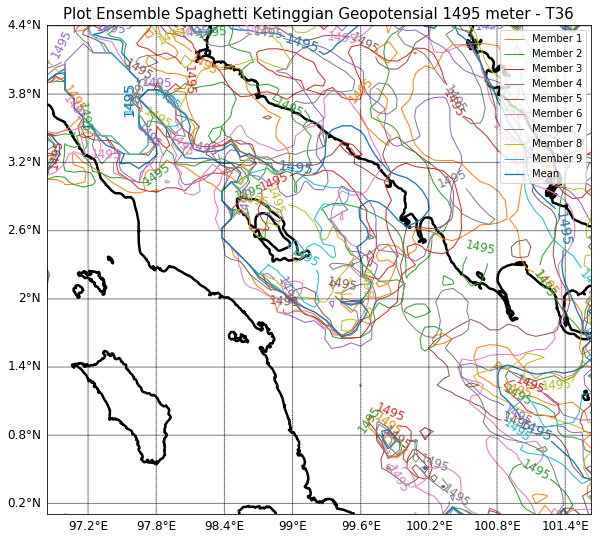

(9, 54, 60)
(54, 60)


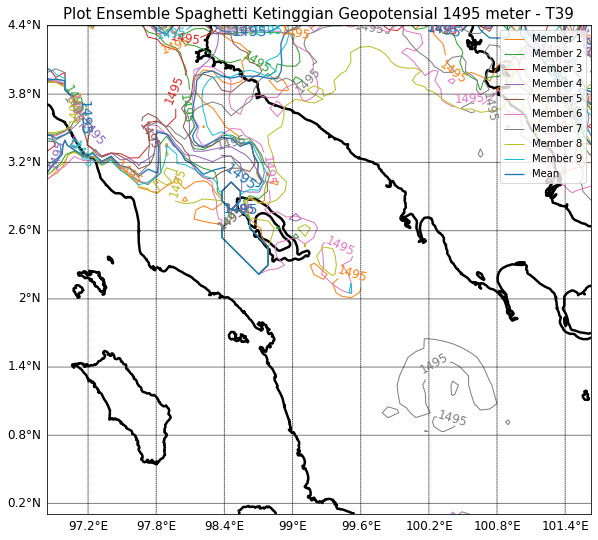

In [176]:
for time in np.arange (33,42,3):
    xx = int(time)
    Z11 = getvar(file1,"z",units='m',timeidx=xx)
    Z12 = getvar(file2,"z",units='m',timeidx=xx)
    Z13 = getvar(file3,"z",units='m',timeidx=xx)
    Z14 = getvar(file4,"z",units='m',timeidx=xx)
    Z21 = getvar(file5,"z",units='m',timeidx=xx)
    Z22 = getvar(file6,"z",units='m',timeidx=xx)
    Z23 = getvar(file7,"z",units='m',timeidx=xx)
    Z31 = getvar(file8,"z",units='m',timeidx=xx)
    Z32 = getvar(file9,"z",units='m',timeidx=xx)
    
    P11 = getvar(file1,"p",units='hpa',timeidx=xx)
    P12 = getvar(file2,"p",units='hpa',timeidx=xx)
    P13 = getvar(file3,"p",units='hpa',timeidx=xx)
    P14 = getvar(file4,"p",units='hpa',timeidx=xx)
    P21 = getvar(file5,"p",units='hpa',timeidx=xx)
    P22 = getvar(file6,"p",units='hpa',timeidx=xx)
    P23 = getvar(file7,"p",units='hpa',timeidx=xx)
    P31 = getvar(file8,"p",units='hpa',timeidx=xx)
    P32 = getvar(file9,"p",units='hpa',timeidx=xx)
    
    ht11_850 = interplevel(Z11, P11, 850).fillna(0)
    ht12_850 = interplevel(Z12, P12, 850).fillna(0)
    ht13_850 = interplevel(Z13, P13, 850).fillna(0)
    ht14_850 = interplevel(Z14, P14, 850).fillna(0)
    ht21_850 = interplevel(Z21, P21, 850).fillna(0)
    ht22_850 = interplevel(Z22, P22, 850).fillna(0)
    ht23_850 = interplevel(Z23, P23, 850).fillna(0)
    ht31_850 = interplevel(Z31, P31, 850).fillna(0)
    ht32_850 = interplevel(Z32, P32, 850).fillna(0)
    
    ens = np.stack((ht11_850,ht12_850,ht13_850,ht14_850,ht21_850,ht22_850,ht23_850,ht31_850,ht32_850))
    print(ens.shape)
    ens_std = np.std(ens,axis=0)
    print(ens_std.shape)
    ens_mean = np.mean(ens,axis=0)

    ht8=np.empty([10,54,60])              
    ht8[0,:,:]=ht11_850
    ht8[1,:,:]=ht12_850
    ht8[2,:,:]=ht13_850
    ht8[3,:,:]=ht14_850
    ht8[4,:,:]=ht21_850
    ht8[5,:,:]=ht22_850
    ht8[6,:,:]=ht23_850
    ht8[7,:,:]=ht31_850
    ht8[8,:,:]=ht32_850
    ht8[9,:,:]=ens_mean
    
    swd = getvar(file1, "p",xx)
    lats, lons = latlon_coords(swd)
    bm = get_basemap(swd,resolution='h')
    
    fig = plt.figure(figsize=(12,9))
    
    parallels = np.arange(-1,5, 0.6)
    meridians = np.arange(96,102, 0.6)

    bm.drawparallels(parallels,labels=[1,0,0,0],fontsize=12,color='black')
    bm.drawmeridians(meridians,labels=[0,0,0,1],fontsize=12,color='black')
    
    bm.drawcoastlines(linewidth=2.5)
    bm.drawstates(linewidth=2.5)
    bm.drawcountries(linewidth=2.5)
    
    x, y = bm(to_np(lons), to_np(lats))
    
    lev=[1495]

    a = bm.contour(x, y, to_np(ht8[0,:,:]),lev,colors='C1',linewidths=1,label='member 1')
    b = bm.contour(x, y, to_np(ht8[1,:,:]),lev,colors='C2',linewidths=1,label='member 2')
    c = bm.contour(x, y, to_np(ht8[2,:,:]),lev,colors='C3',linewidths=1,label='member 3')
    d = bm.contour(x, y, to_np(ht8[3,:,:]),lev,colors='C4',linewidths=1,label='member 4')
    e = bm.contour(x, y, to_np(ht8[4,:,:]),lev,colors='C5',linewidths=1,label='member 5')
    f = bm.contour(x, y, to_np(ht8[5,:,:]),lev,colors='C6',linewidths=1,label='member 6')
    g = bm.contour(x, y, to_np(ht8[6,:,:]),lev,colors='C7',linewidths=1,label='member 7')
    i = bm.contour(x, y, to_np(ht8[7,:,:]),lev,colors='C8',linewidths=1,label='member 8')
    j = bm.contour(x, y, to_np(ht8[8,:,:]),lev,colors='C9',linewidths=1,label='member 9')
    h = bm.contour(x, y, to_np(ht8[9,:,:]),lev,colors='C10',linewidths=1.3,label='mean')

    plt.clabel(a, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(b, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(c, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(d, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(e, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(f, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(g, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(i, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(j, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(h, inline=1, fontsize=14, fmt="%1.0f")
    
    h1,_ = a.legend_elements()
    h2,_ = b.legend_elements()
    h3,_ = c.legend_elements()
    h4,_ = d.legend_elements()
    h5,_ = e.legend_elements()
    h6,_ = f.legend_elements()
    h7,_ = g.legend_elements()
    h9,_ = i.legend_elements()
    h10,_ = j.legend_elements()
    h8,_ = h.legend_elements()
    plt.legend([h1[0], h2[0], h3[0], h4[0], h5[0], h6[0], h7[0], h9[0], h10[0],h8[0]],
               ['Member 1', 'Member 2','Member 3','Member 4','Member 5','Member 6','Member 7','Member 8','Member 9','Mean'], fontsize=10, 
               loc='upper right')

    
    plt.title("Plot Ensemble Spaghetti Ketinggian Geopotensial 1495 meter - T" + str(xx), size=15)
    plt.show()
    fig.savefig('geop1495-t'+str(xx) +'.png')

# Dew Point

<ipython-input-29-71a512602544>:57: UserWarning: The following kwargs were not used by contour: 'label'
  a = bm.contour(x, y, td1,lev,colors='C1',linewidths=1,label='member 1')
<ipython-input-29-71a512602544>:58: UserWarning: The following kwargs were not used by contour: 'label'
  b = bm.contour(x, y, td2,lev,colors='C2',linewidths=1,label='member 2')
<ipython-input-29-71a512602544>:59: UserWarning: The following kwargs were not used by contour: 'label'
  c = bm.contour(x, y, td3,lev,colors='C3',linewidths=1,label='member 3')
<ipython-input-29-71a512602544>:60: UserWarning: The following kwargs were not used by contour: 'label'
  d = bm.contour(x, y, td4,lev,colors='C4',linewidths=1,label='member 4')
<ipython-input-29-71a512602544>:61: UserWarning: The following kwargs were not used by contour: 'label'
  e = bm.contour(x, y, td5,lev,colors='C5',linewidths=1,label='member 5')
<ipython-input-29-71a512602544>:62: UserWarning: The following kwargs were not used by contour: 'label'
  f = 

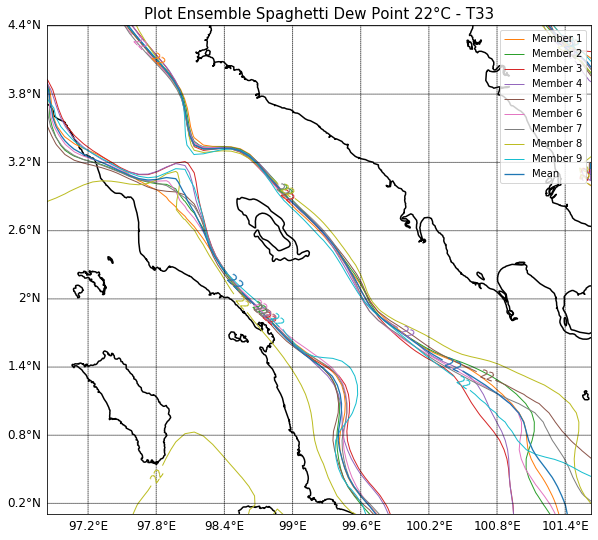

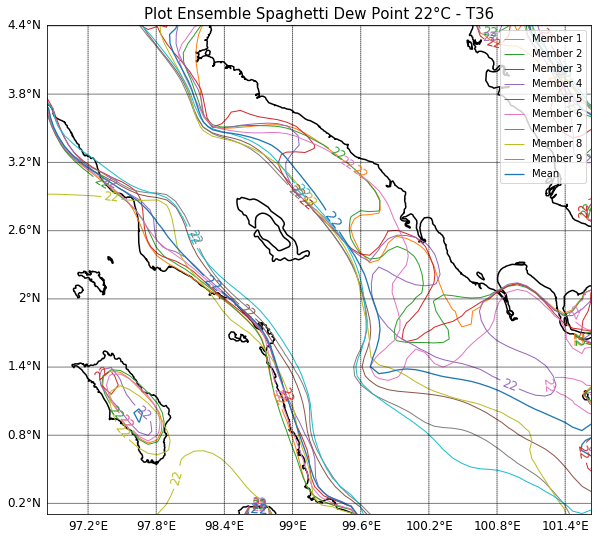

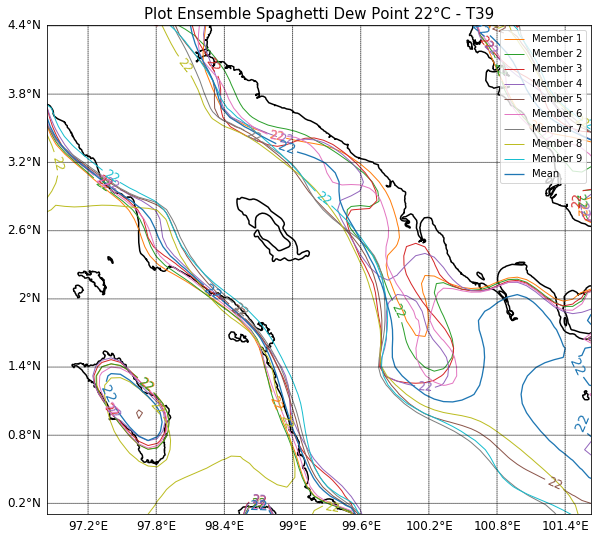

In [29]:
for time in np.arange (33,42,3):
    xx=int(time)
    td11 = getvar(file1,"td2",xx)
    td12 = getvar(file2,"td2",xx)
    td13 = getvar(file3,"td2",xx)
    td14 = getvar(file4,"td2",xx)
    td21 = getvar(file5,"td2",xx)
    td22 = getvar(file6,"td2",xx)
    td23 = getvar(file7,"td2",xx)
    td31 = getvar(file8,"td2",xx)
    td32 = getvar(file9,"td2",xx)
    
    data=np.empty([9,54,60])              
    data[0,:,:]=td11
    data[1,:,:]=td12
    data[2,:,:]=td13
    data[3,:,:]=td14
    data[4,:,:]=td21
    data[5,:,:]=td22
    data[6,:,:]=td23
    data[7,:,:]=td31
    data[8,:,:]=td32

    Td = np.nanmean(data,axis=0)
    
    td1 = smooth2d(td11,10)
    td2 = smooth2d(td12,10)
    td3 = smooth2d(td13,10)
    td4 = smooth2d(td14,10)
    td5 = smooth2d(td21,10)
    td6 = smooth2d(td22,10)
    td7 = smooth2d(td23,10)
    td8 = smooth2d(td31,10)
    td9 = smooth2d(td32,10)
    td10= smooth2d(Td,10)
    
    swd = getvar(file1, "td2",xx)
    lats, lons = latlon_coords(swd)
    bm = get_basemap(swd,resolution='h')
    
    fig = plt.figure(figsize=(12,9))

    parallels = np.arange(-1,5, 0.6)
    meridians = np.arange(96,102, 0.6)

    bm.drawparallels(parallels,labels=[1,0,0,0],fontsize=12,color='black')
    bm.drawmeridians(meridians,labels=[0,0,0,1],fontsize=12,color='black')
    
    bm.drawcoastlines(linewidth=1.5)
    bm.drawstates(linewidth=2.5)
    bm.drawcountries(linewidth=2.5)
    
    x, y = bm(to_np(lons), to_np(lats))
    
    lev=[22]

    a = bm.contour(x, y, td1,lev,colors='C1',linewidths=1,label='member 1')
    b = bm.contour(x, y, td2,lev,colors='C2',linewidths=1,label='member 2')
    c = bm.contour(x, y, td3,lev,colors='C3',linewidths=1,label='member 3')
    d = bm.contour(x, y, td4,lev,colors='C4',linewidths=1,label='member 4')
    e = bm.contour(x, y, td5,lev,colors='C5',linewidths=1,label='member 5')
    f = bm.contour(x, y, td6,lev,colors='C6',linewidths=1,label='member 6')
    g = bm.contour(x, y, td7,lev,colors='C7',linewidths=1,label='member 7')
    i = bm.contour(x, y, td8,lev,colors='C8',linewidths=1,label='member 8')
    j = bm.contour(x, y, td9,lev,colors='C9',linewidths=1,label='member 9')
    h = bm.contour(x, y, td10,lev,colors='C10',linewidths=1.3,label='mean')

    plt.clabel(a, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(b, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(c, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(d, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(e, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(f, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(g, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(i, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(j, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(h, inline=1, fontsize=14, fmt="%1.0f")
    
    h1,_ = a.legend_elements()
    h2,_ = b.legend_elements()
    h3,_ = c.legend_elements()
    h4,_ = d.legend_elements()
    h5,_ = e.legend_elements()
    h6,_ = f.legend_elements()
    h7,_ = g.legend_elements()
    h9,_ = i.legend_elements()
    h10,_ = j.legend_elements()
    h8,_ = h.legend_elements()
    plt.legend([h1[0], h2[0], h3[0], h4[0], h5[0], h6[0], h7[0], h9[0], h10[0], h8[0]],
               ['Member 1', 'Member 2','Member 3','Member 4','Member 5','Member 6','Member 7','Member 8','Member 9','Mean'], fontsize=10, 
               loc='upper right')

    
    plt.title("Plot Ensemble Spaghetti Dew Point 22°C - T" + str(xx), size=15)
    plt.show()
    fig.savefig('td22-t'+str(xx) +'.png')

<ipython-input-22-89b2be8f8ab2>:57: UserWarning: The following kwargs were not used by contour: 'label'
  a = bm.contour(x, y, td1,lev,colors='C1',linewidths=1,label='member 1')
<ipython-input-22-89b2be8f8ab2>:58: UserWarning: The following kwargs were not used by contour: 'label'
  b = bm.contour(x, y, td2,lev,colors='C2',linewidths=1,label='member 2')
<ipython-input-22-89b2be8f8ab2>:59: UserWarning: The following kwargs were not used by contour: 'label'
  c = bm.contour(x, y, td3,lev,colors='C3',linewidths=1,label='member 3')
<ipython-input-22-89b2be8f8ab2>:60: UserWarning: The following kwargs were not used by contour: 'label'
  d = bm.contour(x, y, td4,lev,colors='C4',linewidths=1,label='member 4')
<ipython-input-22-89b2be8f8ab2>:61: UserWarning: No contour levels were found within the data range.
  e = bm.contour(x, y, td5,lev,colors='C5',linewidths=1,label='member 5')
<ipython-input-22-89b2be8f8ab2>:61: UserWarning: The following kwargs were not used by contour: 'label'
  e = bm.

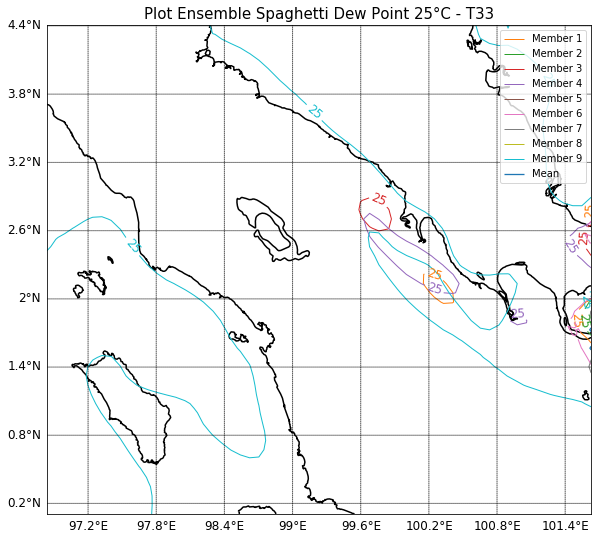

<ipython-input-22-89b2be8f8ab2>:57: UserWarning: No contour levels were found within the data range.
  a = bm.contour(x, y, td1,lev,colors='C1',linewidths=1,label='member 1')
<ipython-input-22-89b2be8f8ab2>:58: UserWarning: No contour levels were found within the data range.
  b = bm.contour(x, y, td2,lev,colors='C2',linewidths=1,label='member 2')
<ipython-input-22-89b2be8f8ab2>:59: UserWarning: No contour levels were found within the data range.
  c = bm.contour(x, y, td3,lev,colors='C3',linewidths=1,label='member 3')
<ipython-input-22-89b2be8f8ab2>:63: UserWarning: No contour levels were found within the data range.
  g = bm.contour(x, y, td7,lev,colors='C7',linewidths=1,label='member 7')
<ipython-input-22-89b2be8f8ab2>:66: UserWarning: No contour levels were found within the data range.
  h = bm.contour(x, y, td10,lev,colors='C10',linewidths=1.3,label='mean')


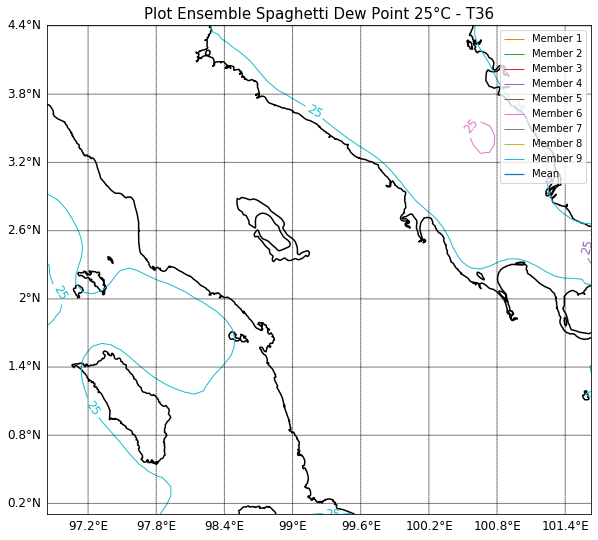

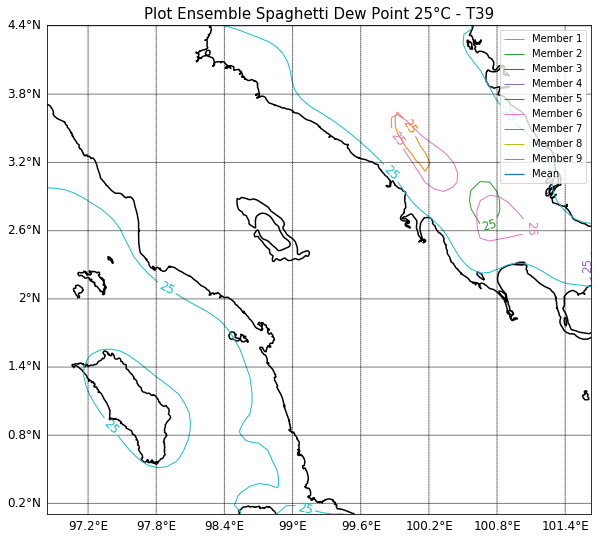

In [22]:
for time in np.arange (33,42,3):
    xx=int(time)
    td11 = getvar(file1,"td2",xx)
    td12 = getvar(file2,"td2",xx)
    td13 = getvar(file3,"td2",xx)
    td14 = getvar(file4,"td2",xx)
    td21 = getvar(file5,"td2",xx)
    td22 = getvar(file6,"td2",xx)
    td23 = getvar(file7,"td2",xx)
    td31 = getvar(file8,"td2",xx)
    td32 = getvar(file9,"td2",xx)
    
    data=np.empty([9,54,60])              
    data[0,:,:]=td11
    data[1,:,:]=td12
    data[2,:,:]=td13
    data[3,:,:]=td14
    data[4,:,:]=td21
    data[5,:,:]=td22
    data[6,:,:]=td23
    data[7,:,:]=td31
    data[8,:,:]=td32

    Td = np.nanmean(data,axis=0)
    
    td1 = smooth2d(td11,10)
    td2 = smooth2d(td12,10)
    td3 = smooth2d(td13,10)
    td4 = smooth2d(td14,10)
    td5 = smooth2d(td21,10)
    td6 = smooth2d(td22,10)
    td7 = smooth2d(td23,10)
    td8 = smooth2d(td31,10)
    td9 = smooth2d(td32,10)
    td10= smooth2d(Td,10)
    
    swd = getvar(file1, "td2",xx)
    lats, lons = latlon_coords(swd)
    bm = get_basemap(swd,resolution='h')
    
    fig = plt.figure(figsize=(12,9))
    
    parallels = np.arange(-1,5, 0.6)
    meridians = np.arange(96,102, 0.6)

    bm.drawparallels(parallels,labels=[1,0,0,0],fontsize=12,color='black')
    bm.drawmeridians(meridians,labels=[0,0,0,1],fontsize=12,color='black')
    
    bm.drawcoastlines(linewidth=1.5)
    bm.drawstates(linewidth=2.5)
    bm.drawcountries(linewidth=2.5)
    
    x, y = bm(to_np(lons), to_np(lats))
    
    lev=[25]

    a = bm.contour(x, y, td1,lev,colors='C1',linewidths=1,label='member 1')
    b = bm.contour(x, y, td2,lev,colors='C2',linewidths=1,label='member 2')
    c = bm.contour(x, y, td3,lev,colors='C3',linewidths=1,label='member 3')
    d = bm.contour(x, y, td4,lev,colors='C4',linewidths=1,label='member 4')
    e = bm.contour(x, y, td5,lev,colors='C5',linewidths=1,label='member 5')
    f = bm.contour(x, y, td6,lev,colors='C6',linewidths=1,label='member 6')
    g = bm.contour(x, y, td7,lev,colors='C7',linewidths=1,label='member 7')
    i = bm.contour(x, y, td8,lev,colors='C8',linewidths=1,label='member 8')
    j = bm.contour(x, y, td9,lev,colors='C9',linewidths=1,label='member 9')
    h = bm.contour(x, y, td10,lev,colors='C10',linewidths=1.3,label='mean')

    plt.clabel(a, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(b, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(c, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(d, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(e, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(f, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(g, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(i, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(j, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(h, inline=1, fontsize=14, fmt="%1.0f")
    
    h1,_ = a.legend_elements()
    h2,_ = b.legend_elements()
    h3,_ = c.legend_elements()
    h4,_ = d.legend_elements()
    h5,_ = e.legend_elements()
    h6,_ = f.legend_elements()
    h7,_ = g.legend_elements()
    h9,_ = i.legend_elements()
    h10,_ = j.legend_elements()
    h8,_ = h.legend_elements()
    plt.legend([h1[0], h2[0], h3[0], h4[0], h5[0], h6[0], h7[0], h9[0], h10[0], h8[0]],
               ['Member 1', 'Member 2','Member 3','Member 4','Member 5','Member 6','Member 7','Member 8','Member 9','Mean'], fontsize=10, 
               loc='upper right')

    
    plt.title("Plot Ensemble Spaghetti Dew Point 25°C - T" + str(xx), size=15)
    plt.show()
    fig.savefig('td25-t'+str(xx) +'.png')

# OLR

In [23]:
xx = 33
olr11 = getvar(file1,"OLR",timeidx=xx)
olr11

<xarray.DataArray 'OLR' (south_north: 54, west_east: 60)>
array([[289.8421 , 289.72958, 289.66547, ..., 293.38885, 293.7608 ,
        294.1452 ],
       [289.57956, 289.4589 , 289.38333, ..., 293.9061 , 294.1625 ,
        293.81488],
       [289.37723, 289.21255, 289.093  , ..., 294.67596, 294.72217,
        293.6526 ],
       ...,
       [201.27402, 201.78793, 194.08856, ..., 254.46727, 261.67383,
        263.48978],
       [185.47044, 180.57947, 183.76385, ..., 254.09181, 261.22385,
        264.2271 ],
       [181.54668, 184.6152 , 184.8684 , ..., 253.74857, 263.1808 ,
        264.77786]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 96.83 96.92 97.0 ... 101.5 101.6
    XLAT     (south_north, west_east) float32 0.1036 0.1036 ... 4.406 4.406
    XTIME    float32 1.98e+03
    Time     datetime64[ns] 2020-12-03T09:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  TOA OUTGOING LONG WAVE
    units:        W m-2
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   Mercator(stand_lon=103.0, moad_cen_lat=2.5, truelat1=5.0, t...

<ipython-input-26-cdf606c95094>:57: UserWarning: No contour levels were found within the data range.
  a = bm.contour(x, y, olr1,lev,colors='C1',linewidths=1,label='member 1')
<ipython-input-26-cdf606c95094>:57: UserWarning: The following kwargs were not used by contour: 'label'
  a = bm.contour(x, y, olr1,lev,colors='C1',linewidths=1,label='member 1')
<ipython-input-26-cdf606c95094>:58: UserWarning: The following kwargs were not used by contour: 'label'
  b = bm.contour(x, y, olr2,lev,colors='C2',linewidths=1,label='member 2')
<ipython-input-26-cdf606c95094>:59: UserWarning: No contour levels were found within the data range.
  c = bm.contour(x, y, olr3,lev,colors='C3',linewidths=1,label='member 3')
<ipython-input-26-cdf606c95094>:59: UserWarning: The following kwargs were not used by contour: 'label'
  c = bm.contour(x, y, olr3,lev,colors='C3',linewidths=1,label='member 3')
<ipython-input-26-cdf606c95094>:60: UserWarning: The following kwargs were not used by contour: 'label'
  d = b

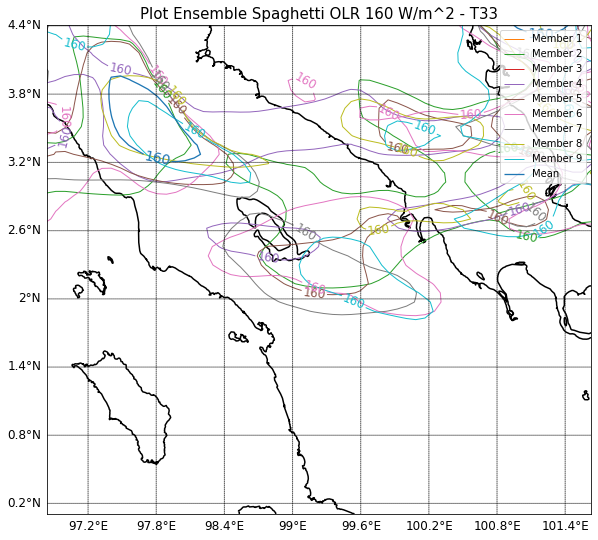

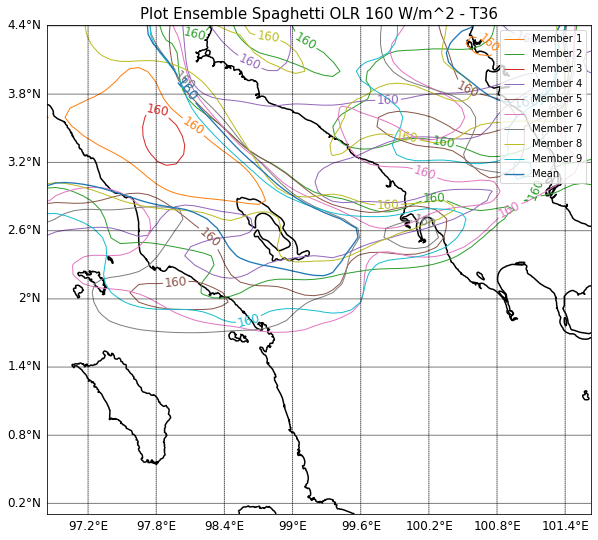

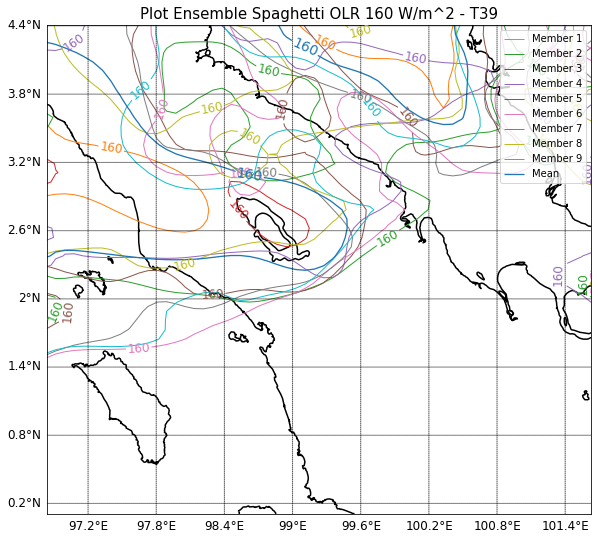

In [26]:
for time in np.arange (33,42,3):
    xx=int(time)
    olr11 = getvar(file1,"OLR",xx)
    olr12 = getvar(file2,"OLR",xx)
    olr13 = getvar(file3,"OLR",xx)
    olr14 = getvar(file4,"OLR",xx)
    olr21 = getvar(file5,"OLR",xx)
    olr22 = getvar(file6,"OLR",xx)
    olr23 = getvar(file7,"OLR",xx)
    olr31 = getvar(file8,"OLR",xx)
    olr32 = getvar(file9,"OLR",xx)
    
    data=np.empty([9,54,60])              
    data[0,:,:]=olr11
    data[1,:,:]=olr12
    data[2,:,:]=olr13
    data[3,:,:]=olr14
    data[4,:,:]=olr21
    data[5,:,:]=olr22
    data[6,:,:]=olr23
    data[7,:,:]=olr31
    data[8,:,:]=olr32

    OLR = np.nanmean(data,axis=0)
    
    olr1 = smooth2d(olr11,10)
    olr2 = smooth2d(olr12,10)
    olr3 = smooth2d(olr13,10)
    olr4 = smooth2d(olr14,10)
    olr5 = smooth2d(olr21,10)
    olr6 = smooth2d(olr22,10)
    olr7 = smooth2d(olr23,10)
    olr8 = smooth2d(olr31,10)
    olr9 = smooth2d(olr32,10)
    olr10= smooth2d(OLR,10)
    
    swd = getvar(file1, "OLR",xx)
    lats, lons = latlon_coords(swd)
    bm = get_basemap(swd,resolution='h')
    
    fig = plt.figure(figsize=(12,9))
    
    parallels = np.arange(-1,5, 0.6)
    meridians = np.arange(96,102, 0.6)

    bm.drawparallels(parallels,labels=[1,0,0,0],fontsize=12,color='black')
    bm.drawmeridians(meridians,labels=[0,0,0,1],fontsize=12,color='black')
    
    bm.drawcoastlines(linewidth=1.5)
    bm.drawstates(linewidth=2.5)
    bm.drawcountries(linewidth=2.5)
    
    x, y = bm(to_np(lons), to_np(lats))
    
    lev=[160]

    a = bm.contour(x, y, olr1,lev,colors='C1',linewidths=1,label='member 1')
    b = bm.contour(x, y, olr2,lev,colors='C2',linewidths=1,label='member 2')
    c = bm.contour(x, y, olr3,lev,colors='C3',linewidths=1,label='member 3')
    d = bm.contour(x, y, olr4,lev,colors='C4',linewidths=1,label='member 4')
    e = bm.contour(x, y, olr5,lev,colors='C5',linewidths=1,label='member 5')
    f = bm.contour(x, y, olr6,lev,colors='C6',linewidths=1,label='member 6')
    g = bm.contour(x, y, olr7,lev,colors='C7',linewidths=1,label='member 7')
    i = bm.contour(x, y, olr8,lev,colors='C8',linewidths=1,label='member 8')
    j = bm.contour(x, y, olr9,lev,colors='C9',linewidths=1,label='member 9')
    h = bm.contour(x, y, olr10,lev,colors='C10',linewidths=1.3,label='mean')

    plt.clabel(a, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(b, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(c, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(d, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(e, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(f, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(g, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(i, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(j, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(h, inline=1, fontsize=14, fmt="%1.0f")
    
    h1,_ = a.legend_elements()
    h2,_ = b.legend_elements()
    h3,_ = c.legend_elements()
    h4,_ = d.legend_elements()
    h5,_ = e.legend_elements()
    h6,_ = f.legend_elements()
    h7,_ = g.legend_elements()
    h9,_ = i.legend_elements()
    h10,_ = j.legend_elements()
    h8,_ = h.legend_elements()
    plt.legend([h1[0], h2[0], h3[0], h4[0], h5[0], h6[0], h7[0], h9[0], h10[0], h8[0]],
               ['Member 1', 'Member 2','Member 3','Member 4','Member 5','Member 6','Member 7','Member 8','Member 9','Mean'], fontsize=10, 
               loc='upper right')

    
    plt.title("Plot Ensemble Spaghetti OLR 160 W/m^2 - T" + str(xx), size=15)
    plt.show()
    fig.savefig('olr160-t'+str(xx) +'.png')

<ipython-input-30-d0bb438997e7>:57: UserWarning: The following kwargs were not used by contour: 'label'
  a = bm.contour(x, y, olr1,lev,colors='C1',linewidths=1,label='member 1')
<ipython-input-30-d0bb438997e7>:58: UserWarning: The following kwargs were not used by contour: 'label'
  b = bm.contour(x, y, olr2,lev,colors='C2',linewidths=1,label='member 2')
<ipython-input-30-d0bb438997e7>:59: UserWarning: The following kwargs were not used by contour: 'label'
  c = bm.contour(x, y, olr3,lev,colors='C3',linewidths=1,label='member 3')
<ipython-input-30-d0bb438997e7>:60: UserWarning: The following kwargs were not used by contour: 'label'
  d = bm.contour(x, y, olr4,lev,colors='C4',linewidths=1,label='member 4')
<ipython-input-30-d0bb438997e7>:61: UserWarning: The following kwargs were not used by contour: 'label'
  e = bm.contour(x, y, olr5,lev,colors='C5',linewidths=1,label='member 5')
<ipython-input-30-d0bb438997e7>:62: UserWarning: The following kwargs were not used by contour: 'label'
 

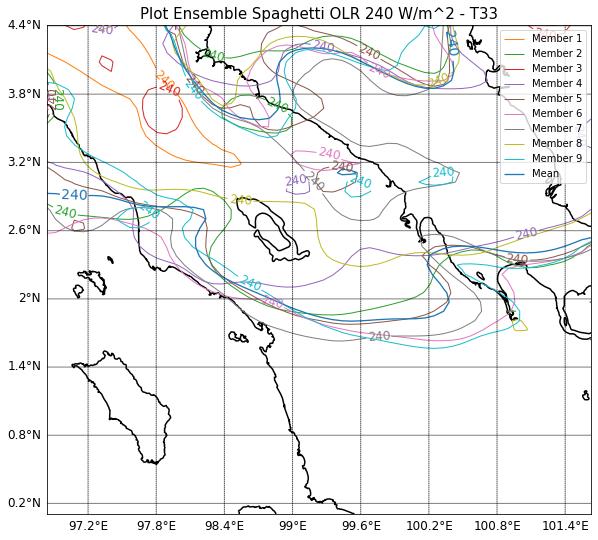

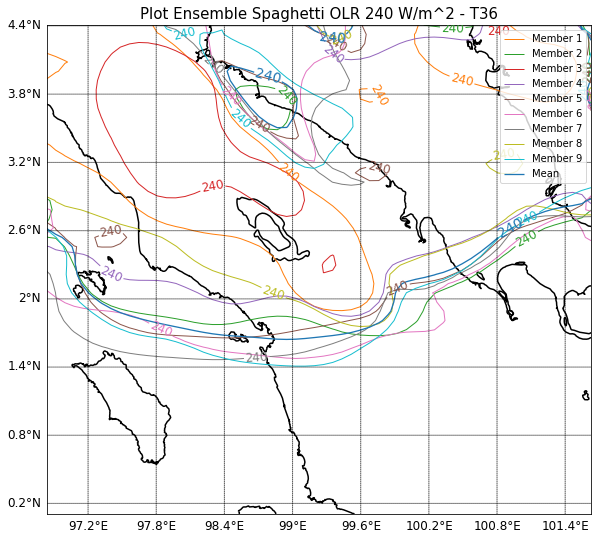

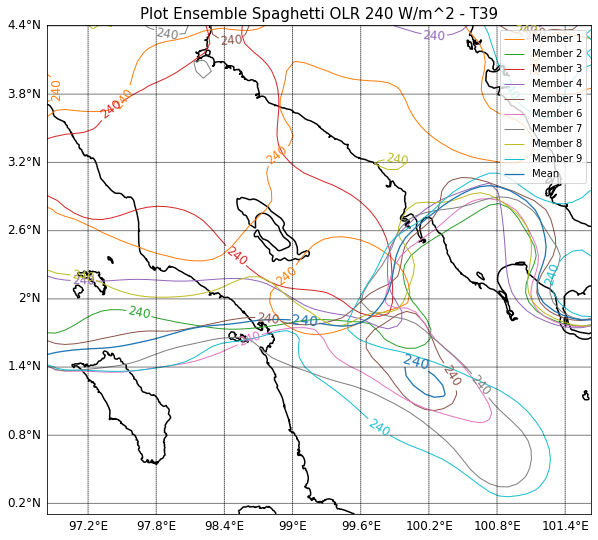

In [30]:
for time in np.arange (33,42,3):
    xx=int(time)
    olr11 = getvar(file1,"OLR",xx)
    olr12 = getvar(file2,"OLR",xx)
    olr13 = getvar(file3,"OLR",xx)
    olr14 = getvar(file4,"OLR",xx)
    olr21 = getvar(file5,"OLR",xx)
    olr22 = getvar(file6,"OLR",xx)
    olr23 = getvar(file7,"OLR",xx)
    olr31 = getvar(file8,"OLR",xx)
    olr32 = getvar(file9,"OLR",xx)
    
    data=np.empty([9,54,60])              
    data[0,:,:]=olr11
    data[1,:,:]=olr12
    data[2,:,:]=olr13
    data[3,:,:]=olr14
    data[4,:,:]=olr21
    data[5,:,:]=olr22
    data[6,:,:]=olr23
    data[7,:,:]=olr31
    data[8,:,:]=olr32

    OLR = np.nanmean(data,axis=0)
    
    olr1 = smooth2d(olr11,10)
    olr2 = smooth2d(olr12,10)
    olr3 = smooth2d(olr13,10)
    olr4 = smooth2d(olr14,10)
    olr5 = smooth2d(olr21,10)
    olr6 = smooth2d(olr22,10)
    olr7 = smooth2d(olr23,10)
    olr8 = smooth2d(olr31,10)
    olr9 = smooth2d(olr32,10)
    olr10= smooth2d(OLR,10)
    
    swd = getvar(file1, "OLR",xx)
    lats, lons = latlon_coords(swd)
    bm = get_basemap(swd,resolution='h')
    
    fig = plt.figure(figsize=(12,9))
    
    parallels = np.arange(-1,5, 0.6)
    meridians = np.arange(96,102, 0.6)

    bm.drawparallels(parallels,labels=[1,0,0,0],fontsize=12,color='black')
    bm.drawmeridians(meridians,labels=[0,0,0,1],fontsize=12,color='black')
    
    bm.drawcoastlines(linewidth=1.5)
    bm.drawstates(linewidth=2.5)
    bm.drawcountries(linewidth=2.5)
    
    x, y = bm(to_np(lons), to_np(lats))
    
    lev=[240]

    a = bm.contour(x, y, olr1,lev,colors='C1',linewidths=1,label='member 1')
    b = bm.contour(x, y, olr2,lev,colors='C2',linewidths=1,label='member 2')
    c = bm.contour(x, y, olr3,lev,colors='C3',linewidths=1,label='member 3')
    d = bm.contour(x, y, olr4,lev,colors='C4',linewidths=1,label='member 4')
    e = bm.contour(x, y, olr5,lev,colors='C5',linewidths=1,label='member 5')
    f = bm.contour(x, y, olr6,lev,colors='C6',linewidths=1,label='member 6')
    g = bm.contour(x, y, olr7,lev,colors='C7',linewidths=1,label='member 7')
    i = bm.contour(x, y, olr8,lev,colors='C8',linewidths=1,label='member 8')
    j = bm.contour(x, y, olr9,lev,colors='C9',linewidths=1,label='member 9')
    h = bm.contour(x, y, olr10,lev,colors='C10',linewidths=1.3,label='mean')

    plt.clabel(a, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(b, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(c, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(d, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(e, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(f, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(g, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(i, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(j, inline=1, fontsize=12, fmt="%1.0f")
    plt.clabel(h, inline=1, fontsize=14, fmt="%1.0f")
    
    h1,_ = a.legend_elements()
    h2,_ = b.legend_elements()
    h3,_ = c.legend_elements()
    h4,_ = d.legend_elements()
    h5,_ = e.legend_elements()
    h6,_ = f.legend_elements()
    h7,_ = g.legend_elements()
    h9,_ = i.legend_elements()
    h10,_ = j.legend_elements()
    h8,_ = h.legend_elements()
    plt.legend([h1[0], h2[0], h3[0], h4[0], h5[0], h6[0], h7[0], h9[0], h10[0], h8[0]],
               ['Member 1', 'Member 2','Member 3','Member 4','Member 5','Member 6','Member 7','Member 8','Member 9','Mean'], fontsize=10, 
               loc='upper right')

    
    plt.title("Plot Ensemble Spaghetti OLR 240 W/m^2 - T" + str(xx), size=15)
    plt.show()
    fig.savefig('olr240-t'+str(xx) +'.png')